In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings(action="ignore")

In [11]:
years = '2002-2021-05'
# years = '2020-06-2021-05-31'
# years = '2016-01-2021-05-31'


df = pd.read_csv('./data/' + years + '_all.csv', index_col=0)
df

평균 수온(°C)
2002-01-01    12.9000
2002-01-02    12.2000
2002-01-03    11.9000
2002-01-04    11.7000
2002-01-05    11.7000
...               ...
2021-05-27    17.4000
2021-05-28    17.1000
2021-05-29    17.6000
2021-05-30    17.9000
2021-05-31    18.2000

[7091 rows x 1 columns]

In [13]:
# converting column names from korean to english
df.rename(columns={'평균 수온(°C)':'temperature'}, inplace=True)
display(df)

temperature
2002-01-01      12.9000
2002-01-02      12.2000
2002-01-03      11.9000
2002-01-04      11.7000
2002-01-05      11.7000
...                 ...
2021-05-27      17.4000
2021-05-28      17.1000
2021-05-29      17.6000
2021-05-30      17.9000
2021-05-31      18.2000

[7091 rows x 1 columns]

In [14]:
df.info()       # 다 채워서 이제 non-null 됨

<class 'pandas.core.frame.DataFrame'>
Index: 7091 entries, 2002-01-01 to 2021-05-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7091 non-null   float64
dtypes: float64(1)
memory usage: 110.8+ KB


<Axes: >

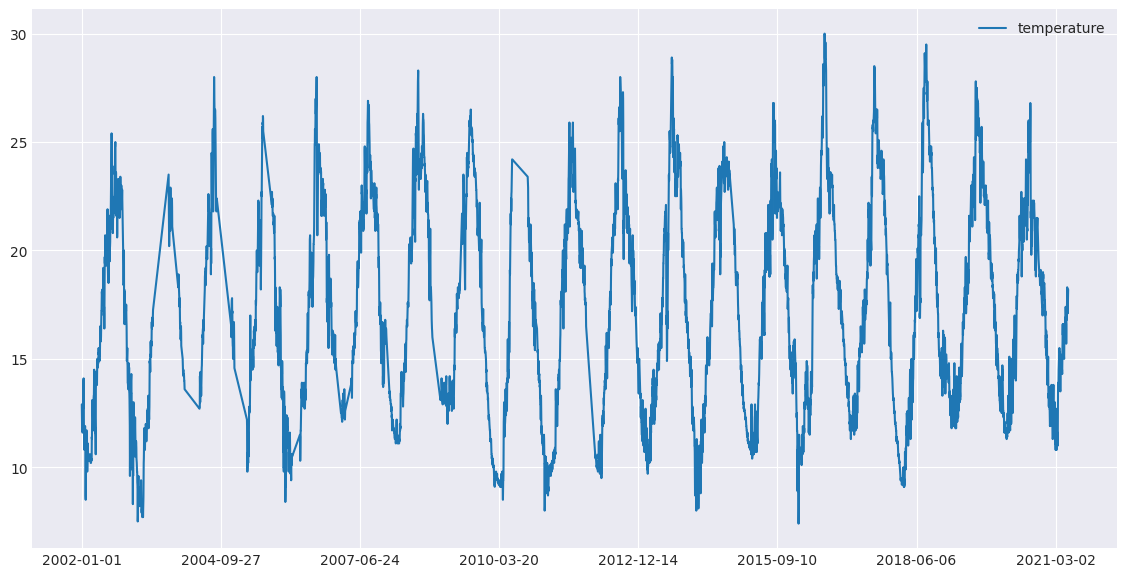

In [15]:
df.plot(figsize=(14, 7))

# ACF, PACF

In [16]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

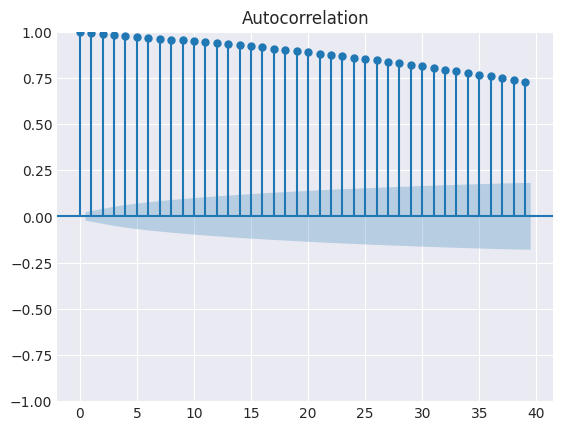

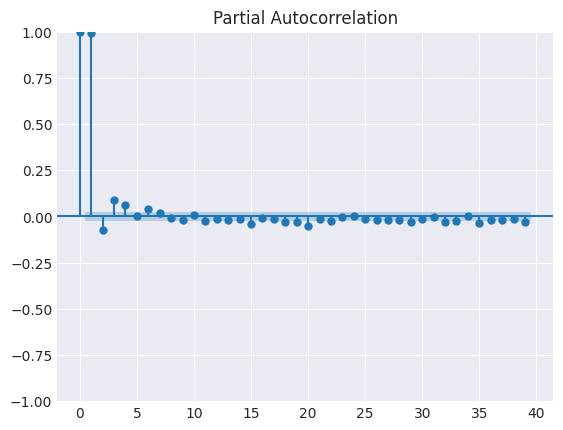

In [20]:
plot_acf(df)
plt.show()

plot_pacf(df)
plt.show()

In [19]:
adf = adfuller(df)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

ADF Statistic: -6.78401436429937
p-value: 2.458263765183291e-09
Critical Values:
	1%: -3.4312772403829
	5%: -2.861949766257434
	10%: -2.566988114551004


- AR(4), 즉 p=4
- ARIMA(4, 0, 0) 을 해야겠다 

# 차분 후 다시 ACF, PACF

In [10]:
df

temperature
2020-06-01         18.9
2020-06-02         18.5
2020-06-03         18.7
2020-06-04         19.0
2020-06-05         18.6
...                 ...
2021-05-27         17.4
2021-05-28         17.1
2021-05-29         17.6
2021-05-30         17.9
2021-05-31         18.2

[365 rows x 1 columns]

In [11]:
dff = df.diff(1).dropna()

In [12]:
dff

temperature
2020-06-02         -0.4
2020-06-03          0.2
2020-06-04          0.3
2020-06-05         -0.4
2020-06-06          0.5
...                 ...
2021-05-27          0.1
2021-05-28         -0.3
2021-05-29          0.5
2021-05-30          0.3
2021-05-31          0.3

[364 rows x 1 columns]

<Axes: >

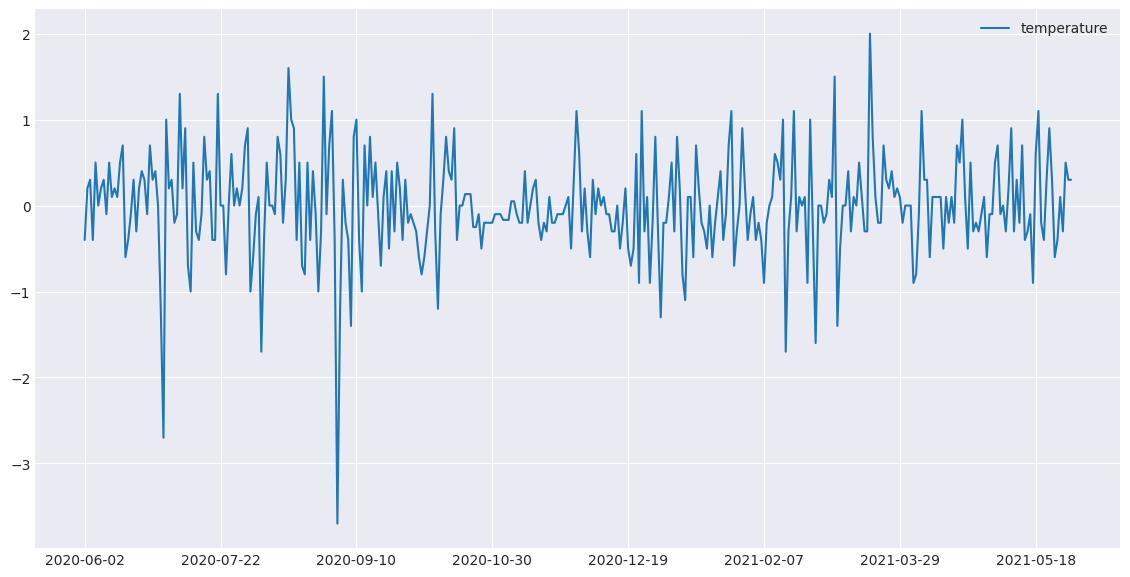

In [25]:
dff.plot(figsize=(14, 7))

In [20]:
adf = adfuller(dff)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

ADF Statistic: -15.115030555577986
p-value: 7.60047663935032e-28
Critical Values:
	1%: -3.448544133483233
	5%: -2.8695574079525565
	10%: -2.5710411593052713


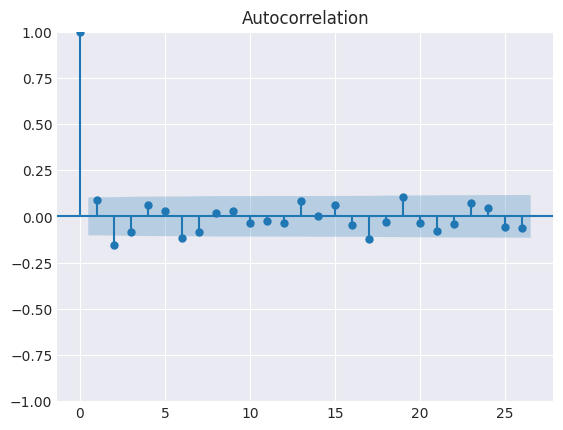

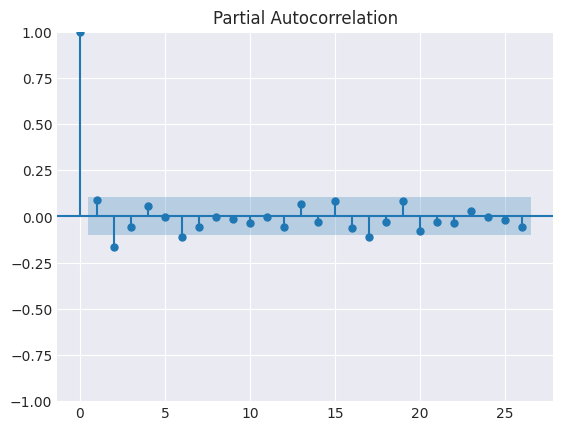

In [23]:
plot_acf(dff)
plt.show()

plot_pacf(dff)
plt.show()

- ACF와 PACF 모두 서서히 감소하는 모양이 아니고, p=1, q=1에서 절단난다.
- 그래서 ARIMA(1, 1, 1)을 해야겠다

# 차분 한번 더!

In [31]:
df

temperature
2020-06-01         18.9
2020-06-02         18.5
2020-06-03         18.7
2020-06-04         19.0
2020-06-05         18.6
...                 ...
2021-05-27         17.4
2021-05-28         17.1
2021-05-29         17.6
2021-05-30         17.9
2021-05-31         18.2

[365 rows x 1 columns]

In [32]:
dff

temperature
2020-06-03         -0.2
2020-06-04          0.5
2020-06-05         -0.1
2020-06-06          0.1
2020-06-07          0.5
...                 ...
2021-05-27         -0.3
2021-05-28         -0.2
2021-05-29          0.2
2021-05-30          0.8
2021-05-31          0.6

[363 rows x 1 columns]

In [16]:
dff_2 = df.diff(2).dropna()
dff_2

In [13]:
dff_2r = dff.diff(1).dropna()
dff_2r

<Axes: >

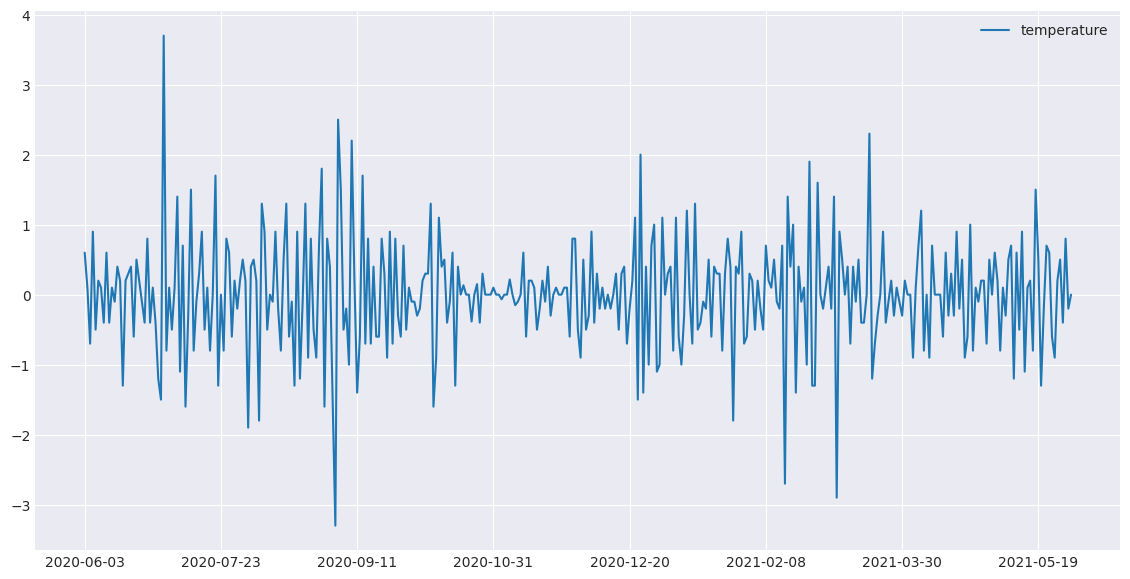

In [18]:
dff_2r.plot(figsize=(14, 7))

In [21]:
adf = adfuller(dff_2r)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

ADF Statistic: -7.9672617230477405
p-value: 2.8429345192619063e-12
Critical Values:
	1%: -3.4494474563375737
	5%: -2.8699542285903887
	10%: -2.5712527305187987


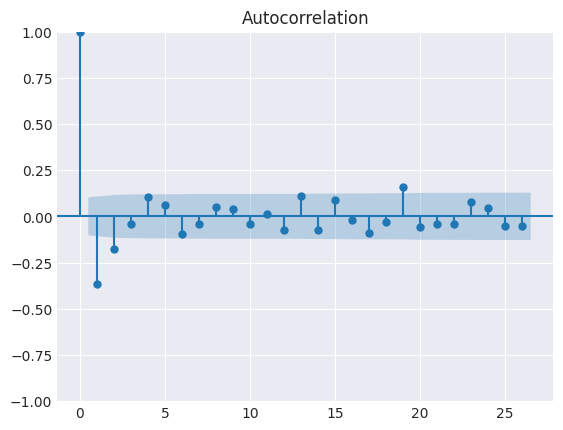

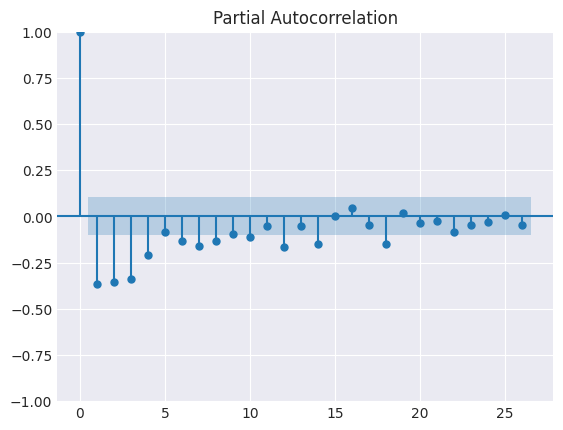

In [22]:
plot_acf(dff_2r)
plt.show()

plot_pacf(dff_2r)
plt.show()

In [21]:
def mape(y_pred, y_true):
  return (np.abs(y_pred - y_true)/y_true).mean() * 100

def mae(y_pred, y_true):
  return np.abs(y_pred - y_true).mean()

def mse(y_pred, y_true):
  return np.mean((np.array(y_true) - np.array(y_pred)) ** 2)

def rmse(y_pred, y_true):
  return np.sqrt(mse(y_pred, y_true))

from sklearn.metrics import r2_score

def r_squered(y_pred, y_true):
  return r2_score(y_true, y_pred)

In [11]:
display(df.head(3))
display(df.tail(3))

temperature
2023-01-01      14.1000
2023-01-02      14.1000
2023-01-03      14.1000

temperature
2023-12-29      15.3000
2023-12-30      14.4000
2023-12-31      14.3000

/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-17   16.6828
2021-05-18   16.7162
2021-05-19   16.7412
2021-05-20   16.7654
2021-05-21   16.7943
2021-05-22   16.7942
2021-05-23   16.8291
2021-05-24   16.8201
2021-05-25   16.8251
2021-05-26   16.8084
2021-05-27   16.8231
2021-05-28   16.8068
2021-05-29   16.7952
2021-05-30   16.7935
2021-05-31   16.8018
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
4.330076660076794 0.7576049549092796 0.7549706881736143 0.8688904926247119 -0.5660164133687466


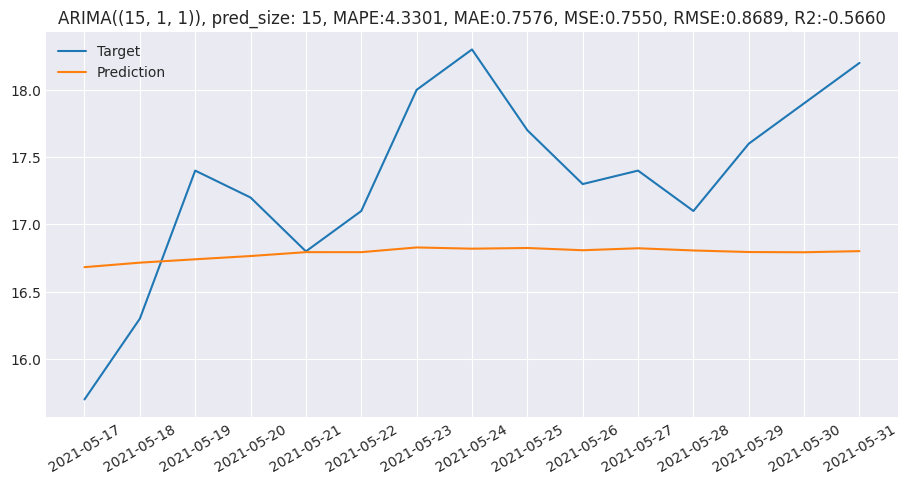

p: 15, d: 1, q: 1, pred_size: 15


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-17   16.6872
2021-05-18   16.7307
2021-05-19   16.7459
2021-05-20   16.7898
2021-05-21   16.8025
2021-05-22   16.8295
2021-05-23   16.8964
2021-05-24   16.8734
2021-05-25   16.8841
2021-05-26   16.8598
2021-05-27   16.8979
2021-05-28   16.9205
2021-05-29   16.9216
2021-05-30   16.9774
2021-05-31   16.9887
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
4.10329713323691 0.7166363095751469 0.6915681001274238 0.8316057359875675 -0.32165538964300566


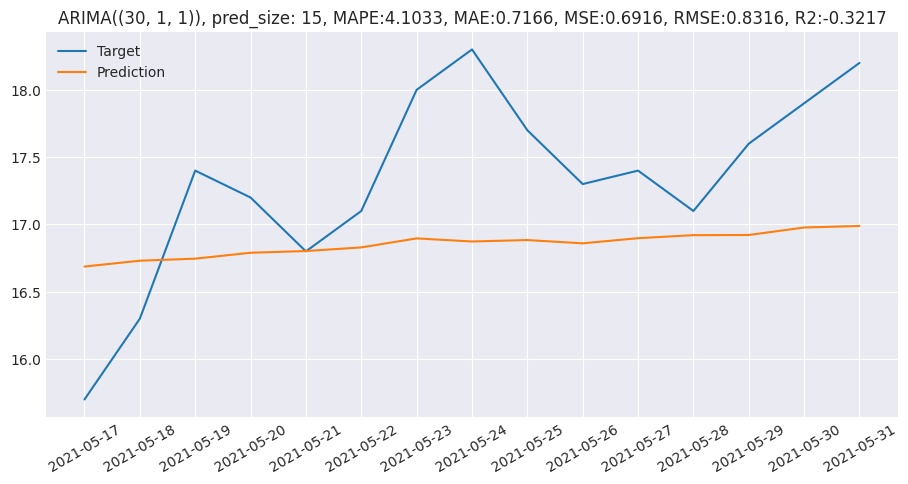

p: 30, d: 1, q: 1, pred_size: 15


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-17   16.6773
2021-05-18   16.7579
2021-05-19   16.8062
2021-05-20   16.9292
2021-05-21   17.0197
2021-05-22   17.0898
2021-05-23   17.1804
2021-05-24   17.1433
2021-05-25   17.2072
2021-05-26   17.1956
2021-05-27   17.2439
2021-05-28   17.2516
2021-05-29   17.2751
2021-05-30   17.2968
2021-05-31   17.2828
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
3.4543712404286517 0.5979519808638062 0.5526623723487146 0.7434126528037538 0.22787705324046503


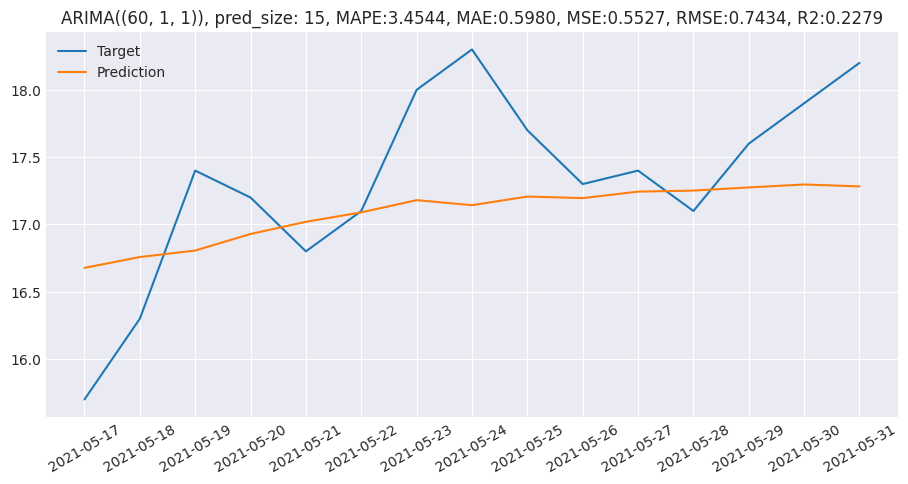

p: 60, d: 1, q: 1, pred_size: 15


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-05-17   16.7912
2021-05-18   17.0574
2021-05-19   17.1867
2021-05-20   17.4108
2021-05-21   17.5801
2021-05-22   17.7919
2021-05-23   17.9645
2021-05-24   18.1024
2021-05-25   18.2705
2021-05-26   18.3079
2021-05-27   18.3935
2021-05-28   18.5325
2021-05-29   18.6428
2021-05-30   18.7492
2021-05-31   18.8715
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
5.311639702052492 0.9010954754999978 1.2631461918625946 1.1238977675316357 -0.41218026101486815


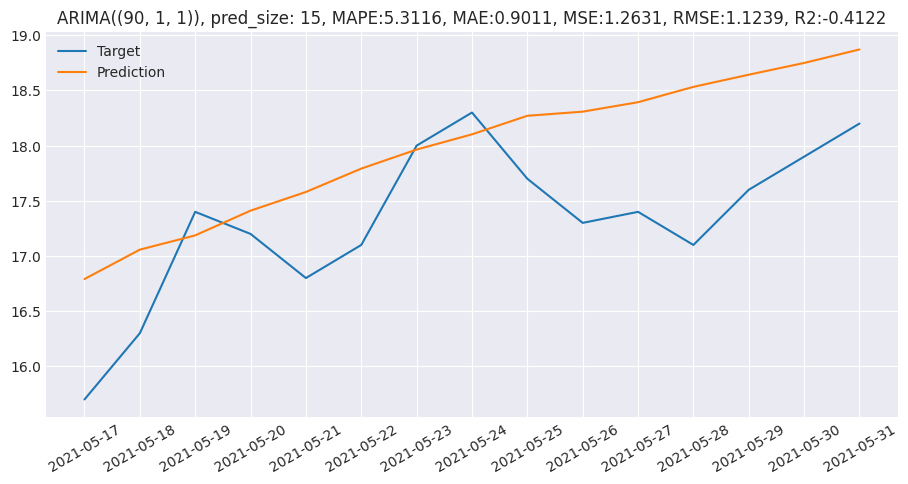

p: 90, d: 1, q: 1, pred_size: 15


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-17   16.6758
2021-05-18   16.7094
2021-05-19   16.7637
2021-05-20   16.8130
2021-05-21   16.8687
2021-05-22   16.8831
2021-05-23   16.9254
2021-05-24   16.9575
2021-05-25   16.9922
2021-05-26   17.0144
2021-05-27   17.0496
2021-05-28   17.0780
2021-05-29   17.1031
2021-05-30   17.1236
2021-05-31   17.1480
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
3.823823674234435 0.6660090014222286 0.6301093490095774 0.7937942737319144 -0.07810776087858162


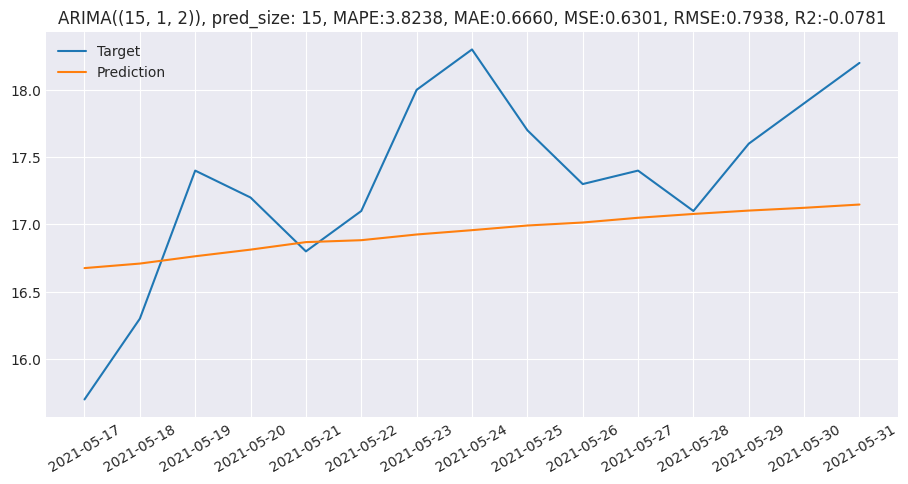

p: 15, d: 1, q: 2, pred_size: 15


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-05-17   16.6959
2021-05-18   16.7416
2021-05-19   16.7867
2021-05-20   16.8589
2021-05-21   16.9272
2021-05-22   16.9838
2021-05-23   17.0719
2021-05-24   17.0772
2021-05-25   17.1011
2021-05-26   17.0839
2021-05-27   17.1231
2021-05-28   17.1485
2021-05-29   17.1560
2021-05-30   17.1996
2021-05-31   17.2100
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
3.613354328435713 0.6277183766540468 0.5849212328782032 0.7648014336271888 0.08734975995136851


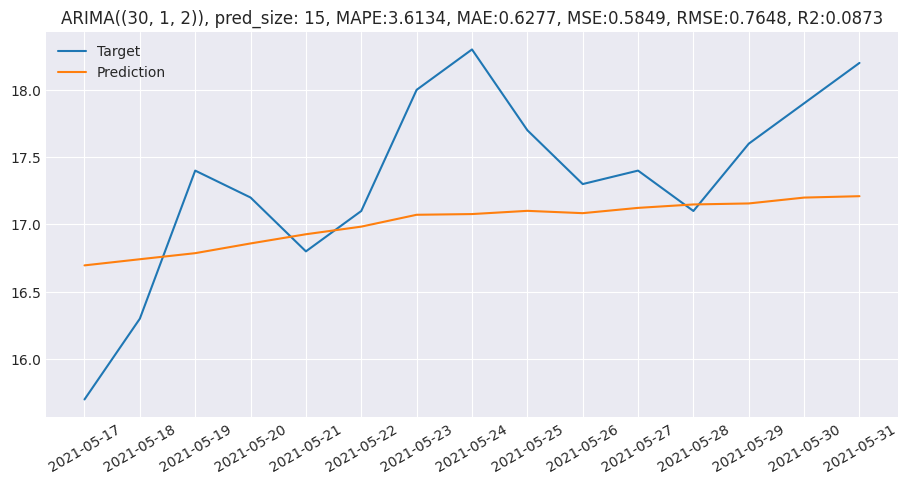

p: 30, d: 1, q: 2, pred_size: 15


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-17   16.6862
2021-05-18   16.7566
2021-05-19   16.7999
2021-05-20   16.9169
2021-05-21   17.0087
2021-05-22   17.0815
2021-05-23   17.1695
2021-05-24   17.1319
2021-05-25   17.1957
2021-05-26   17.1817
2021-05-27   17.2297
2021-05-28   17.2353
2021-05-29   17.2578
2021-05-30   17.2804
2021-05-31   17.2671
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
3.4711348551627283 0.6011597358049958 0.555604298732987 0.745388689700204 0.20652057505377197


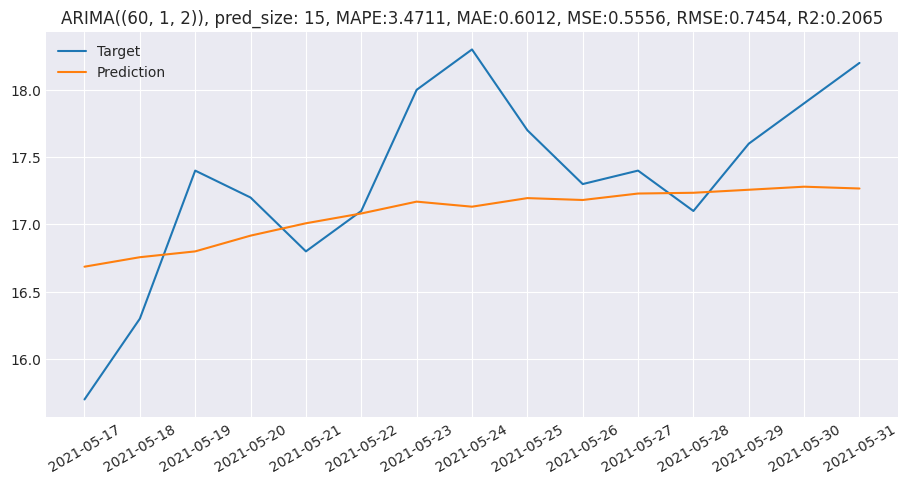

p: 60, d: 1, q: 2, pred_size: 15


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-05-17   16.7666
2021-05-18   17.0125
2021-05-19   17.1225
2021-05-20   17.3770
2021-05-21   17.5338
2021-05-22   17.7593
2021-05-23   17.9463
2021-05-24   18.0879
2021-05-25   18.2199
2021-05-26   18.3336
2021-05-27   18.4168
2021-05-28   18.5517
2021-05-29   18.6506
2021-05-30   18.7638
2021-05-31   18.8618
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
5.330629035118049 0.9048857736412467 1.2675441658048348 1.1258526394714519 -0.400570913476747


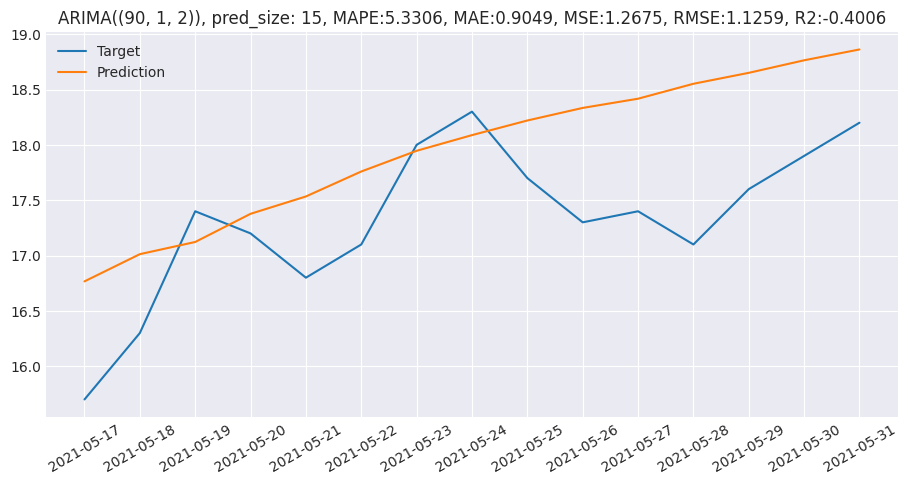

p: 90, d: 1, q: 2, pred_size: 15


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-02   15.1979
2021-05-03   15.3008
2021-05-04   15.3358
2021-05-05   15.3718
2021-05-06   15.3766
2021-05-07   15.3382
2021-05-08   15.3160
2021-05-09   15.2935
2021-05-10   15.2723
2021-05-11   15.2511
2021-05-12   15.2409
2021-05-13   15.2446
2021-05-14   15.2293
2021-05-15   15.2293
2021-05-16   15.2376
2021-05-17   15.2439
2021-05-18   15.2439
2021-05-19   15.2426
2021-05-20   15.2405
2021-05-21   15.2371
2021-05-22   15.2341
2021-05-23   15.2326
2021-05-24   15.2317
2021-05-25   15.2311
2021-05-26   15.2309
2021-05-27   15.2314
2021-05-28   15.2313
2021-05-29   15.2314
2021-05-30   15.2317
2021-05-31   15.2318
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
9.348693443850447 1.6085226347179964 3.1820072427270327 1.7838181641431485 -3.9641347094778787


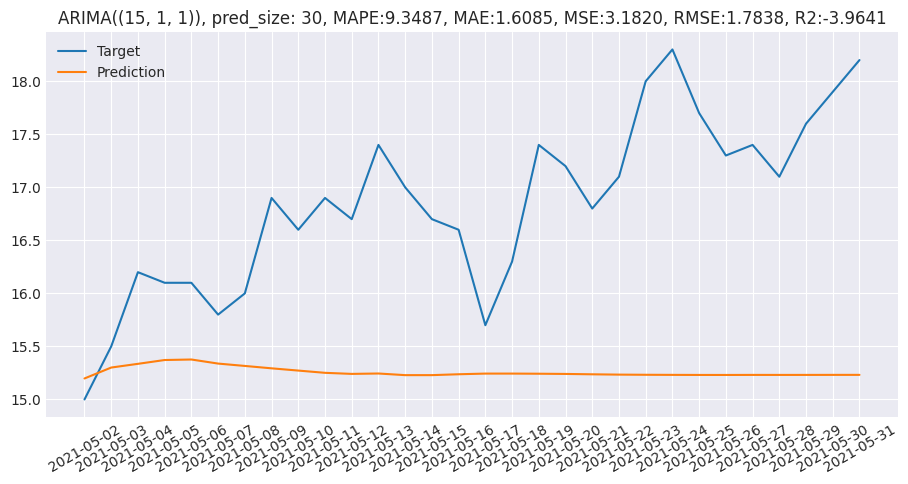

p: 15, d: 1, q: 1, pred_size: 30


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-02   15.1921
2021-05-03   15.2864
2021-05-04   15.3583
2021-05-05   15.4109
2021-05-06   15.4478
2021-05-07   15.4383
2021-05-08   15.4830
2021-05-09   15.5150
2021-05-10   15.5446
2021-05-11   15.5395
2021-05-12   15.5054
2021-05-13   15.5039
2021-05-14   15.4646
2021-05-15   15.4757
2021-05-16   15.4927
2021-05-17   15.5087
2021-05-18   15.5272
2021-05-19   15.5226
2021-05-20   15.5335
2021-05-21   15.5012
2021-05-22   15.4977
2021-05-23   15.5040
2021-05-24   15.4895
2021-05-25   15.4767
2021-05-26   15.4614
2021-05-27   15.4672
2021-05-28   15.4613
2021-05-29   15.4559
2021-05-30   15.4681
2021-05-31   15.4743
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
8.205782800614221 1.414673574965554 2.5660678815802647 1.6018950906911054 -2.8632227491169573


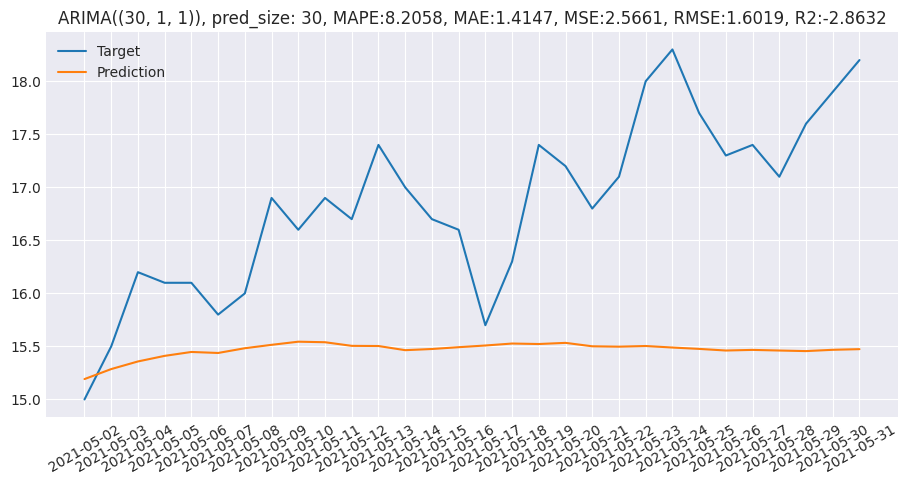

p: 30, d: 1, q: 1, pred_size: 30


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-02   15.2758
2021-05-03   15.3994
2021-05-04   15.4846
2021-05-05   15.5104
2021-05-06   15.5850
2021-05-07   15.6302
2021-05-08   15.7295
2021-05-09   15.7707
2021-05-10   15.8781
2021-05-11   15.9281
2021-05-12   15.9019
2021-05-13   15.9417
2021-05-14   15.9774
2021-05-15   16.0194
2021-05-16   16.0589
2021-05-17   16.0628
2021-05-18   16.1196
2021-05-19   16.1525
2021-05-20   16.2552
2021-05-21   16.3182
2021-05-22   16.3699
2021-05-23   16.4105
2021-05-24   16.3945
2021-05-25   16.4511
2021-05-26   16.4638
2021-05-27   16.4932
2021-05-28   16.4889
2021-05-29   16.5221
2021-05-30   16.5132
2021-05-31   16.5044
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
5.770486835063688 0.9923872970640805 1.419796711892542 1.1915522279331872 -0.41853932116070713


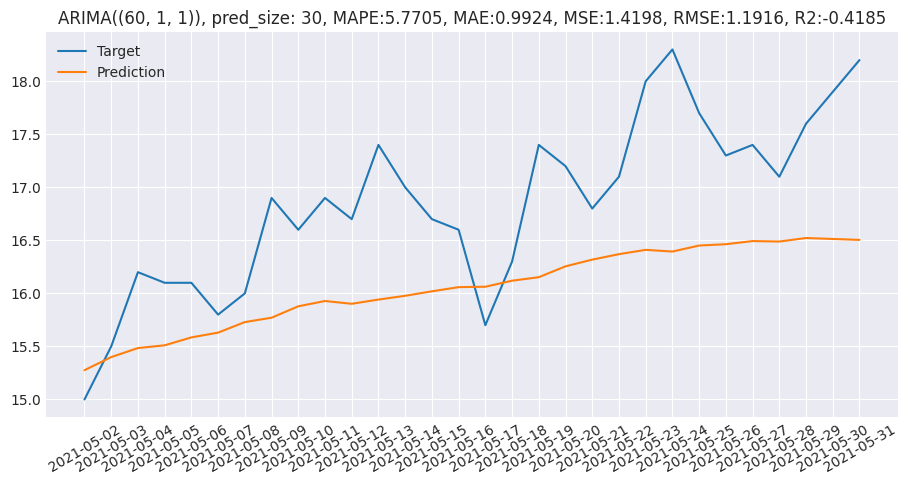

p: 60, d: 1, q: 1, pred_size: 30


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-05-02   15.3639
2021-05-03   15.5543
2021-05-04   15.7227
2021-05-05   15.8371
2021-05-06   16.0695
2021-05-07   16.1872
2021-05-08   16.3097
2021-05-09   16.4538
2021-05-10   16.6295
2021-05-11   16.7981
2021-05-12   16.8816
2021-05-13   17.0235
2021-05-14   17.1478
2021-05-15   17.2232
2021-05-16   17.3016
2021-05-17   17.3856
2021-05-18   17.5990
2021-05-19   17.6926
2021-05-20   17.8904
2021-05-21   18.0333
2021-05-22   18.2188
2021-05-23   18.3448
2021-05-24   18.5075
2021-05-25   18.6743
2021-05-26   18.7345
2021-05-27   18.7983
2021-05-28   18.9207
2021-05-29   19.0435
2021-05-30   19.1222
2021-05-31   19.2535
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
7.482397687605272 1.2442706438993067 2.308013402532803 1.5192147321997647 -0.1752965200516785


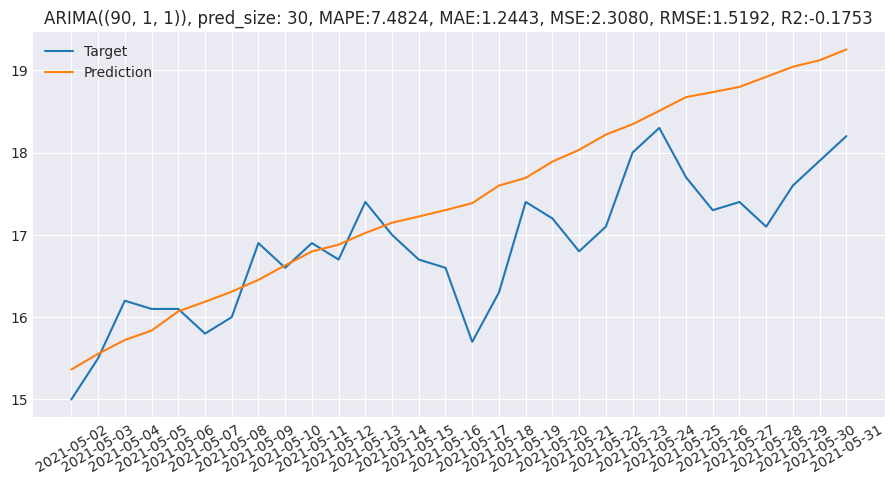

p: 90, d: 1, q: 1, pred_size: 30


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-02   15.2155
2021-05-03   15.3241
2021-05-04   15.3846
2021-05-05   15.4518
2021-05-06   15.5167
2021-05-07   15.5484
2021-05-08   15.5647
2021-05-09   15.5925
2021-05-10   15.6116
2021-05-11   15.6233
2021-05-12   15.6343
2021-05-13   15.6516
2021-05-14   15.6622
2021-05-15   15.6712
2021-05-16   15.6823
2021-05-17   15.6963
2021-05-18   15.7099
2021-05-19   15.7240
2021-05-20   15.7384
2021-05-21   15.7528
2021-05-22   15.7663
2021-05-23   15.7797
2021-05-24   15.7927
2021-05-25   15.8055
2021-05-26   15.8178
2021-05-27   15.8301
2021-05-28   15.8420
2021-05-29   15.8537
2021-05-30   15.8651
2021-05-31   15.8765
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
7.209698386115576 1.244347796202321 2.0752683838443655 1.4405791834690538 -1.8691538170300679


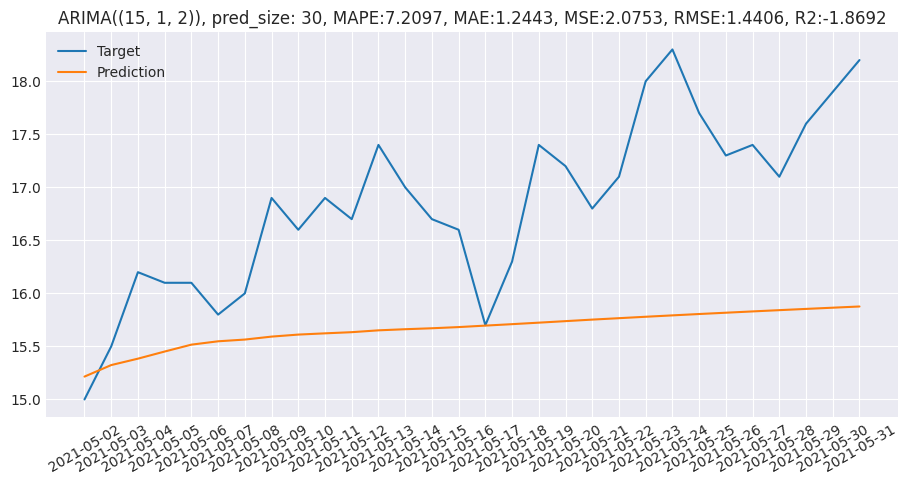

p: 15, d: 1, q: 2, pred_size: 30


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-05-02   15.2188
2021-05-03   15.3166
2021-05-04   15.3783
2021-05-05   15.4280
2021-05-06   15.4959
2021-05-07   15.5067
2021-05-08   15.5795
2021-05-09   15.6104
2021-05-10   15.6574
2021-05-11   15.6595
2021-05-12   15.6429
2021-05-13   15.6516
2021-05-14   15.6145
2021-05-15   15.6340
2021-05-16   15.6573
2021-05-17   15.6856
2021-05-18   15.7122
2021-05-19   15.7443
2021-05-20   15.7923
2021-05-21   15.8230
2021-05-22   15.8594
2021-05-23   15.8933
2021-05-24   15.9183
2021-05-25   15.9268
2021-05-26   15.9306
2021-05-27   15.9455
2021-05-28   15.9502
2021-05-29   15.9581
2021-05-30   15.9647
2021-05-31   15.9751
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
7.048941574581032 1.2164484100123354 2.0021928336300214 1.4149886337458761 -1.653300294560884


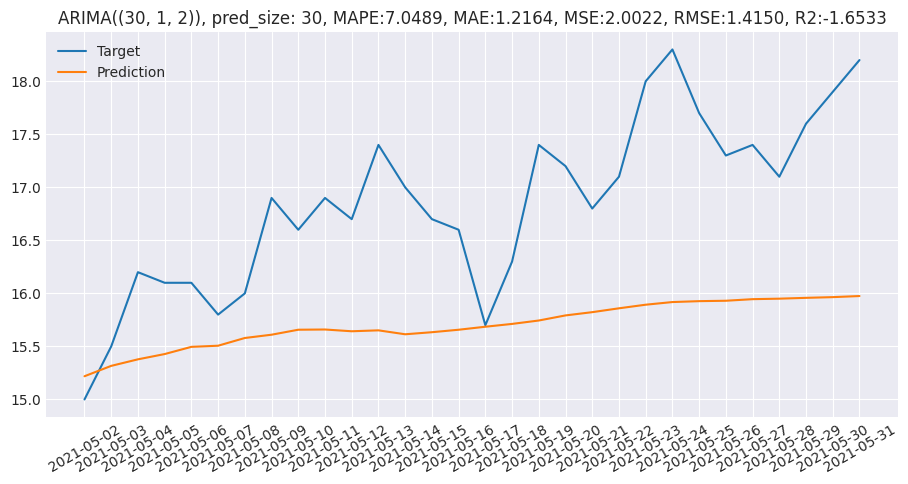

p: 30, d: 1, q: 2, pred_size: 30


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-02   15.2776
2021-05-03   15.4030
2021-05-04   15.4907
2021-05-05   15.5006
2021-05-06   15.5827
2021-05-07   15.6282
2021-05-08   15.7322
2021-05-09   15.7733
2021-05-10   15.8792
2021-05-11   15.9316
2021-05-12   15.9054
2021-05-13   15.9470
2021-05-14   15.9796
2021-05-15   16.0187
2021-05-16   16.0610
2021-05-17   16.0737
2021-05-18   16.1208
2021-05-19   16.1483
2021-05-20   16.2455
2021-05-21   16.3097
2021-05-22   16.3638
2021-05-23   16.4016
2021-05-24   16.3849
2021-05-25   16.4414
2021-05-26   16.4515
2021-05-27   16.4809
2021-05-28   16.4744
2021-05-29   16.5065
2021-05-30   16.4982
2021-05-31   16.4899
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
5.776482048818972 0.9935419189149688 1.4218232505754915 1.1924023023189327 -0.4336455854966783


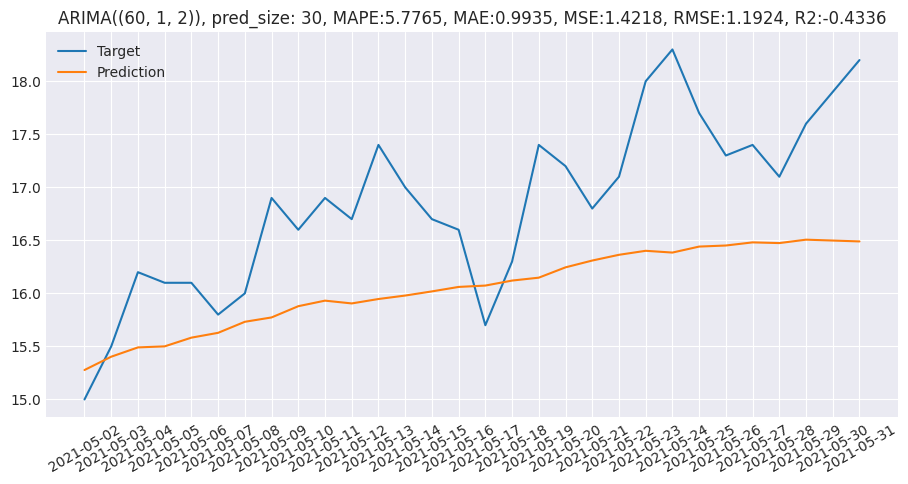

p: 60, d: 1, q: 2, pred_size: 30


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-05-02   15.3665
2021-05-03   15.5619
2021-05-04   15.7384
2021-05-05   15.8690
2021-05-06   16.0981
2021-05-07   16.2447
2021-05-08   16.3662
2021-05-09   16.4972
2021-05-10   16.6601
2021-05-11   16.8057
2021-05-12   16.8631
2021-05-13   17.0026
2021-05-14   17.0977
2021-05-15   17.2143
2021-05-16   17.3314
2021-05-17   17.3957
2021-05-18   17.5821
2021-05-19   17.6559
2021-05-20   17.8811
2021-05-21   18.0098
2021-05-22   18.2061
2021-05-23   18.3474
2021-05-24   18.5127
2021-05-25   18.6438
2021-05-26   18.7824
2021-05-27   18.8425
2021-05-28   18.9599
2021-05-29   19.0711
2021-05-30   19.1573
2021-05-31   19.2616
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
7.476172486727964 1.2430611442427344 2.3151268877552993 1.5215541028025588 -0.1992058143225559


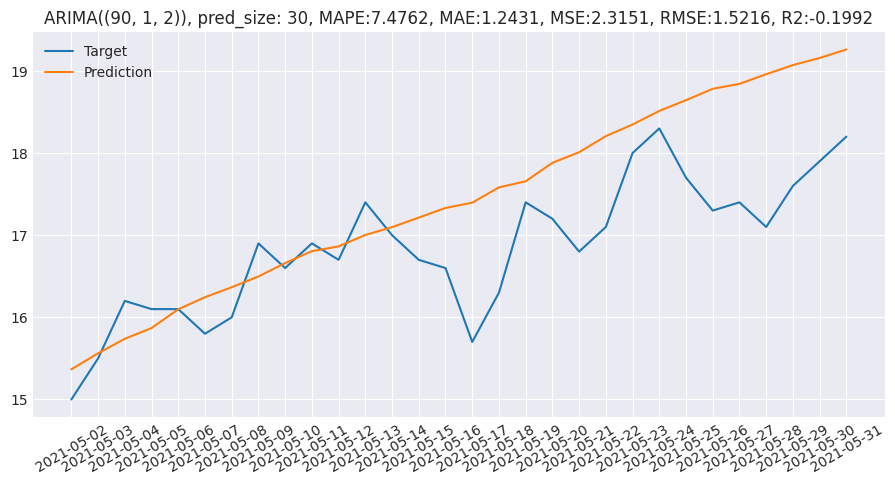

p: 90, d: 1, q: 2, pred_size: 30


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-04-02   15.3517
2021-04-03   15.3763
2021-04-04   15.3980
2021-04-05   15.4219
2021-04-06   15.4641
2021-04-07   15.4859
2021-04-08   15.5006
2021-04-09   15.5135
2021-04-10   15.5160
2021-04-11   15.5171
2021-04-12   15.5178
2021-04-13   15.5115
2021-04-14   15.5129
2021-04-15   15.5158
2021-04-16   15.5207
2021-04-17   15.5240
2021-04-18   15.5266
2021-04-19   15.5287
2021-04-20   15.5306
2021-04-21   15.5314
2021-04-22   15.5317
2021-04-23   15.5319
2021-04-24   15.5318
2021-04-25   15.5318
2021-04-26   15.5319
2021-04-27   15.5320
2021-04-28   15.5323
2021-04-29   15.5327
2021-04-30   15.5330
2021-05-01   15.5333
2021-05-02   15.5334
2021-05-03   15.5335
2021-05-04   15.5335
2021-05-05   15.5335
2021-05-06   15.5335
2021-05-07   15.5335
2021-05-08   15.5335
2021-05-09   15.5336
2021-05-10   15.5336
2021-05-11   15.5336
2021-05-12   15.5336
2021-05-13   15.5337
2021-05-14   15.5337
2021-05-15   15.5337
2021-05-16   15.5337
2021-05-17   15.5337
2021-05-18   15.53

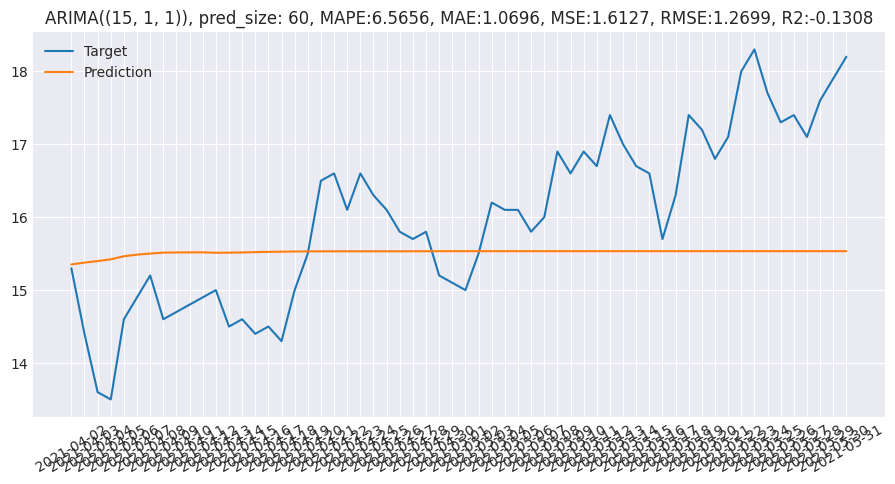

p: 15, d: 1, q: 1, pred_size: 60


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-04-02   15.3833
2021-04-03   15.4193
2021-04-04   15.4511
2021-04-05   15.5421
2021-04-06   15.6935
2021-04-07   15.7773
2021-04-08   15.8492
2021-04-09   15.8940
2021-04-10   15.9122
2021-04-11   15.9660
2021-04-12   16.0425
2021-04-13   16.1164
2021-04-14   16.1735
2021-04-15   16.2363
2021-04-16   16.3057
2021-04-17   16.3152
2021-04-18   16.3208
2021-04-19   16.3350
2021-04-20   16.3710
2021-04-21   16.4136
2021-04-22   16.4379
2021-04-23   16.4684
2021-04-24   16.4904
2021-04-25   16.5063
2021-04-26   16.5242
2021-04-27   16.5344
2021-04-28   16.5439
2021-04-29   16.5581
2021-04-30   16.5748
2021-05-01   16.5930
2021-05-02   16.6096
2021-05-03   16.6267
2021-05-04   16.6433
2021-05-05   16.6563
2021-05-06   16.6640
2021-05-07   16.6729
2021-05-08   16.6808
2021-05-09   16.6899
2021-05-10   16.7007
2021-05-11   16.7107
2021-05-12   16.7191
2021-05-13   16.7254
2021-05-14   16.7314
2021-05-15   16.7365
2021-05-16   16.7405
2021-05-17   16.7454
2021-05-18   16.75

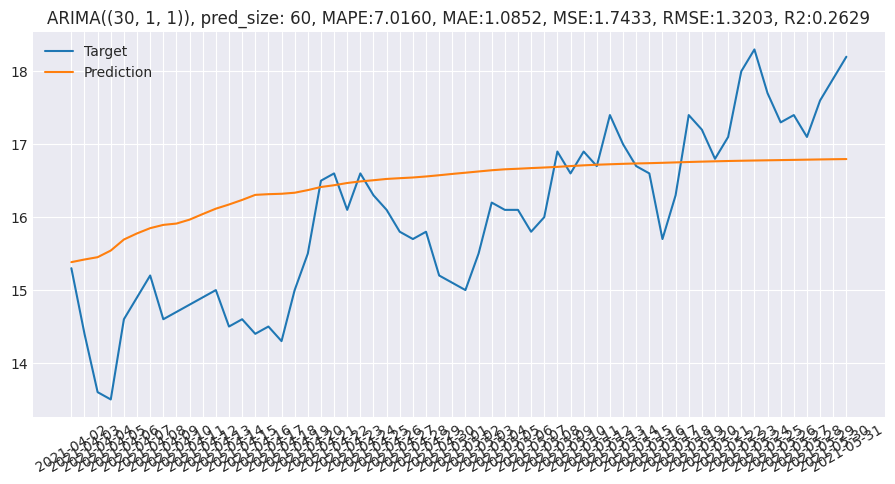

p: 30, d: 1, q: 1, pred_size: 60


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-04-02   15.2631
2021-04-03   15.3300
2021-04-04   15.3327
2021-04-05   15.3744
2021-04-06   15.4554
2021-04-07   15.4323
2021-04-08   15.5201
2021-04-09   15.4791
2021-04-10   15.4491
2021-04-11   15.4398
2021-04-12   15.4759
2021-04-13   15.4876
2021-04-14   15.5348
2021-04-15   15.5889
2021-04-16   15.6888
2021-04-17   15.6250
2021-04-18   15.6729
2021-04-19   15.7459
2021-04-20   15.6421
2021-04-21   15.6725
2021-04-22   15.7551
2021-04-23   15.8386
2021-04-24   15.8086
2021-04-25   15.8853
2021-04-26   15.9060
2021-04-27   15.9664
2021-04-28   15.9522
2021-04-29   15.9567
2021-04-30   16.0329
2021-05-01   16.1077
2021-05-02   16.2001
2021-05-03   16.2404
2021-05-04   16.2762
2021-05-05   16.2949
2021-05-06   16.3498
2021-05-07   16.4125
2021-05-08   16.4781
2021-05-09   16.5190
2021-05-10   16.6066
2021-05-11   16.6860
2021-05-12   16.6900
2021-05-13   16.7557
2021-05-14   16.8285
2021-05-15   16.8897
2021-05-16   16.9365
2021-05-17   16.9801
2021-05-18   17.05

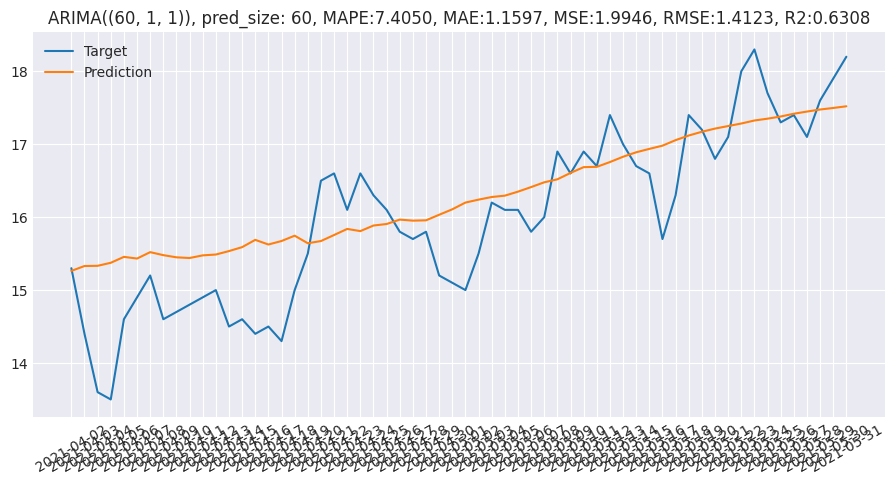

p: 60, d: 1, q: 1, pred_size: 60


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-04-02   15.2698
2021-04-03   15.3755
2021-04-04   15.3545
2021-04-05   15.4619
2021-04-06   15.5858
2021-04-07   15.5906
2021-04-08   15.6196
2021-04-09   15.5703
2021-04-10   15.5539
2021-04-11   15.5489
2021-04-12   15.6508
2021-04-13   15.7112
2021-04-14   15.7718
2021-04-15   15.8375
2021-04-16   15.9433
2021-04-17   15.9775
2021-04-18   16.0946
2021-04-19   16.2154
2021-04-20   16.1445
2021-04-21   16.2005
2021-04-22   16.3035
2021-04-23   16.4255
2021-04-24   16.4830
2021-04-25   16.6264
2021-04-26   16.6724
2021-04-27   16.7023
2021-04-28   16.7065
2021-04-29   16.7780
2021-04-30   16.9420
2021-05-01   17.0478
2021-05-02   17.1778
2021-05-03   17.2423
2021-05-04   17.3235
2021-05-05   17.3926
2021-05-06   17.5728
2021-05-07   17.6918
2021-05-08   17.7651
2021-05-09   17.8913
2021-05-10   18.0188
2021-05-11   18.2028
2021-05-12   18.3039
2021-05-13   18.4534
2021-05-14   18.6042
2021-05-15   18.6883
2021-05-16   18.7612
2021-05-17   18.8730
2021-05-18   19.09

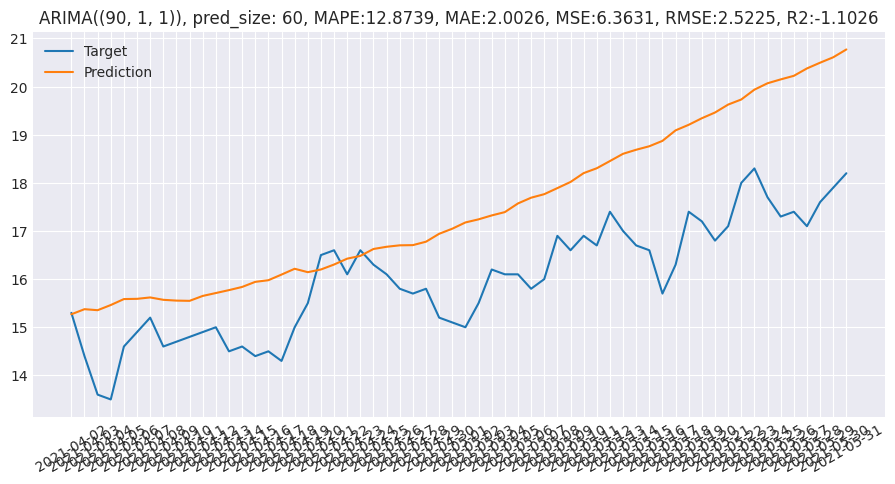

p: 90, d: 1, q: 1, pred_size: 60


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-04-02   15.3512
2021-04-03   15.4044
2021-04-04   15.4611
2021-04-05   15.5165
2021-04-06   15.5710
2021-04-07   15.6245
2021-04-08   15.6811
2021-04-09   15.7361
2021-04-10   15.7893
2021-04-11   15.8416
2021-04-12   15.8939
2021-04-13   15.9418
2021-04-14   15.9876
2021-04-15   16.0323
2021-04-16   16.0765
2021-04-17   16.1202
2021-04-18   16.1633
2021-04-19   16.2060
2021-04-20   16.2480
2021-04-21   16.2894
2021-04-22   16.3300
2021-04-23   16.3701
2021-04-24   16.4095
2021-04-25   16.4483
2021-04-26   16.4863
2021-04-27   16.5238
2021-04-28   16.5606
2021-04-29   16.5968
2021-04-30   16.6323
2021-05-01   16.6672
2021-05-02   16.7015
2021-05-03   16.7353
2021-05-04   16.7685
2021-05-05   16.8011
2021-05-06   16.8332
2021-05-07   16.8647
2021-05-08   16.8957
2021-05-09   16.9262
2021-05-10   16.9562
2021-05-11   16.9856
2021-05-12   17.0146
2021-05-13   17.0431
2021-05-14   17.0711
2021-05-15   17.0986
2021-05-16   17.1256
2021-05-17   17.1522
2021-05-18   17.17

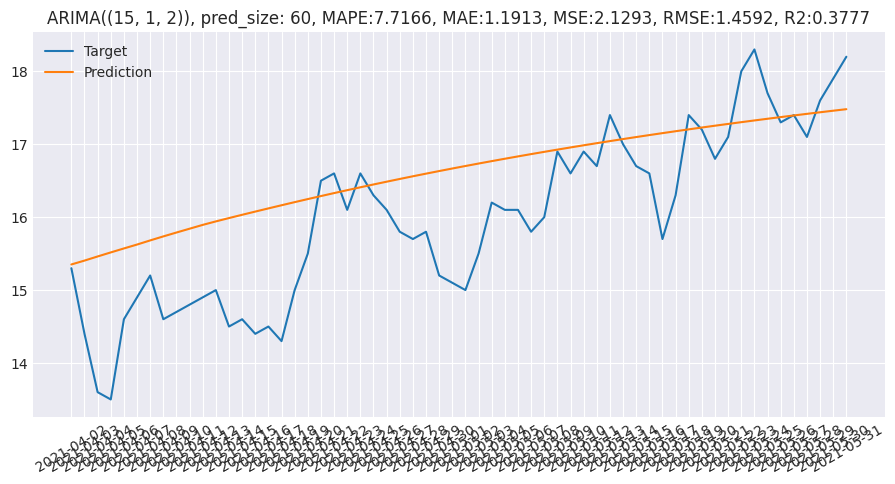

p: 15, d: 1, q: 2, pred_size: 60


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-04-02   15.3334
2021-04-03   15.3246
2021-04-04   15.3536
2021-04-05   15.3796
2021-04-06   15.4831
2021-04-07   15.5151
2021-04-08   15.5511
2021-04-09   15.5642
2021-04-10   15.5432
2021-04-11   15.5684
2021-04-12   15.6183
2021-04-13   15.6804
2021-04-14   15.7238
2021-04-15   15.7689
2021-04-16   15.8163
2021-04-17   15.8737
2021-04-18   15.9116
2021-04-19   15.9608
2021-04-20   16.0099
2021-04-21   16.0714
2021-04-22   16.1279
2021-04-23   16.1934
2021-04-24   16.2458
2021-04-25   16.3061
2021-04-26   16.3570
2021-04-27   16.4080
2021-04-28   16.4492
2021-04-29   16.4919
2021-04-30   16.5333
2021-05-01   16.5780
2021-05-02   16.6197
2021-05-03   16.6625
2021-05-04   16.7024
2021-05-05   16.7419
2021-05-06   16.7788
2021-05-07   16.8163
2021-05-08   16.8515
2021-05-09   16.8871
2021-05-10   16.9212
2021-05-11   16.9562
2021-05-12   16.9899
2021-05-13   17.0234
2021-05-14   17.0554
2021-05-15   17.0877
2021-05-16   17.1185
2021-05-17   17.1496
2021-05-18   17.17

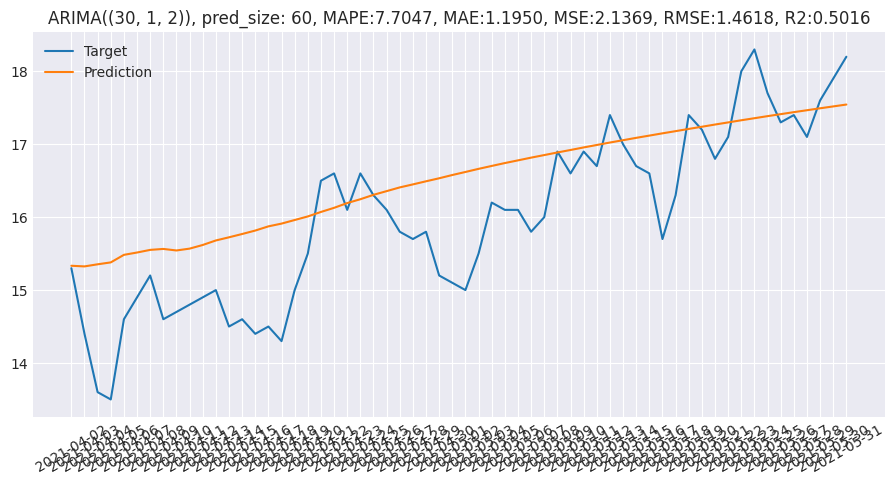

p: 30, d: 1, q: 2, pred_size: 60


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-04-02   15.2607
2021-04-03   15.3280
2021-04-04   15.3313
2021-04-05   15.3712
2021-04-06   15.4551
2021-04-07   15.4307
2021-04-08   15.5197
2021-04-09   15.4843
2021-04-10   15.4570
2021-04-11   15.4499
2021-04-12   15.4890
2021-04-13   15.4983
2021-04-14   15.5453
2021-04-15   15.5958
2021-04-16   15.6838
2021-04-17   15.6279
2021-04-18   15.6786
2021-04-19   15.7576
2021-04-20   15.6457
2021-04-21   15.6787
2021-04-22   15.7595
2021-04-23   15.8430
2021-04-24   15.8097
2021-04-25   15.8965
2021-04-26   15.9070
2021-04-27   15.9667
2021-04-28   15.9603
2021-04-29   15.9672
2021-04-30   16.0444
2021-05-01   16.1222
2021-05-02   16.2161
2021-05-03   16.2578
2021-05-04   16.2948
2021-05-05   16.2984
2021-05-06   16.3607
2021-05-07   16.4240
2021-05-08   16.4944
2021-05-09   16.5357
2021-05-10   16.6217
2021-05-11   16.7032
2021-05-12   16.7075
2021-05-13   16.7750
2021-05-14   16.8451
2021-05-15   16.9035
2021-05-16   16.9538
2021-05-17   17.0065
2021-05-18   17.07

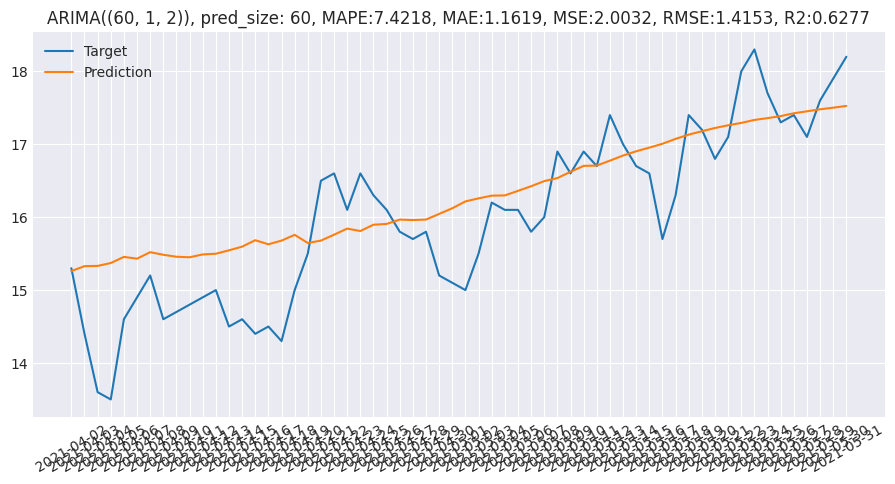

p: 60, d: 1, q: 2, pred_size: 60


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-04-02   15.2849
2021-04-03   15.3537
2021-04-04   15.3528
2021-04-05   15.4421
2021-04-06   15.5594
2021-04-07   15.5909
2021-04-08   15.6652
2021-04-09   15.6206
2021-04-10   15.5896
2021-04-11   15.6044
2021-04-12   15.6894
2021-04-13   15.7327
2021-04-14   15.8022
2021-04-15   15.8804
2021-04-16   16.0113
2021-04-17   16.0442
2021-04-18   16.1715
2021-04-19   16.3007
2021-04-20   16.2168
2021-04-21   16.2538
2021-04-22   16.3538
2021-04-23   16.4920
2021-04-24   16.5217
2021-04-25   16.6259
2021-04-26   16.6867
2021-04-27   16.7483
2021-04-28   16.7489
2021-04-29   16.8011
2021-04-30   16.9439
2021-05-01   17.0797
2021-05-02   17.2183
2021-05-03   17.2905
2021-05-04   17.3805
2021-05-05   17.4704
2021-05-06   17.6508
2021-05-07   17.8018
2021-05-08   17.8710
2021-05-09   17.9857
2021-05-10   18.1012
2021-05-11   18.2634
2021-05-12   18.3398
2021-05-13   18.4891
2021-05-14   18.6060
2021-05-15   18.7404
2021-05-16   18.8511
2021-05-17   18.9472
2021-05-18   19.13

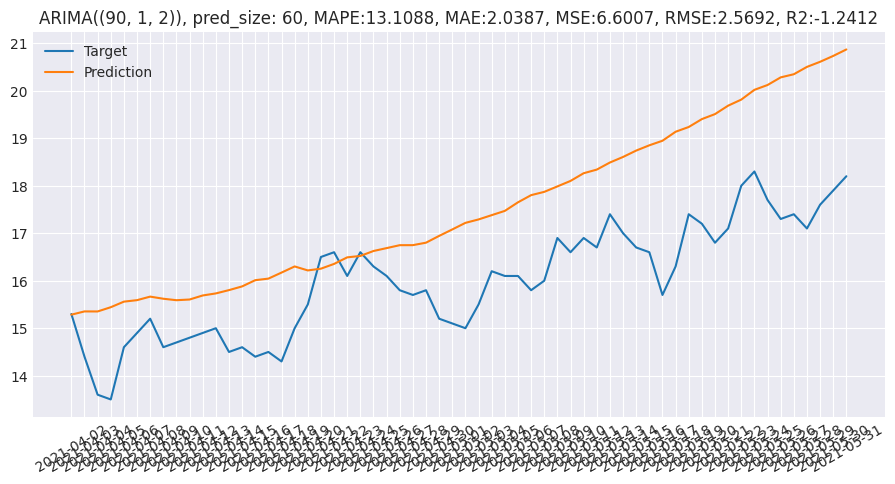

p: 90, d: 1, q: 2, pred_size: 60


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-03-03   10.8835
2021-03-04   11.0059
2021-03-05   10.9654
2021-03-06   10.9351
2021-03-07   10.9314
               ...  
2021-05-27   10.7378
2021-05-28   10.7378
2021-05-29   10.7378
2021-05-30   10.7378
2021-05-31   10.7378
Freq: D, Name: predicted_mean, Length: 90, dtype: float64
--- Evaluation Metrics ---
26.561466508506054 4.2022159769368095 21.79716140160853 4.668743021586059 -4.293762216206256


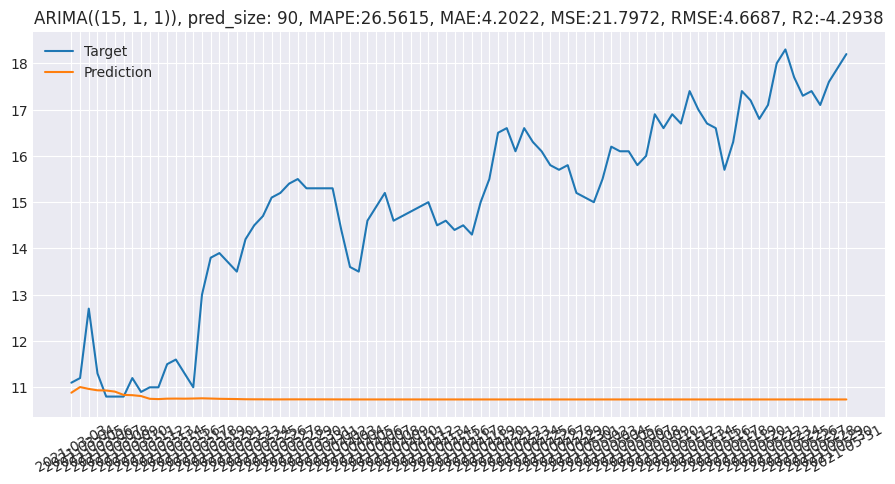

p: 15, d: 1, q: 1, pred_size: 90


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-03-03   10.9188
2021-03-04   11.0216
2021-03-05   10.9685
2021-03-06   10.8775
2021-03-07   10.8810
               ...  
2021-05-27   10.2583
2021-05-28   10.2580
2021-05-29   10.2577
2021-05-30   10.2575
2021-05-31   10.2573
Freq: D, Name: predicted_mean, Length: 90, dtype: float64
--- Evaluation Metrics ---
28.859627521465065 4.538742816909275 24.78025561056967 4.977977060068645 -5.172207618996011


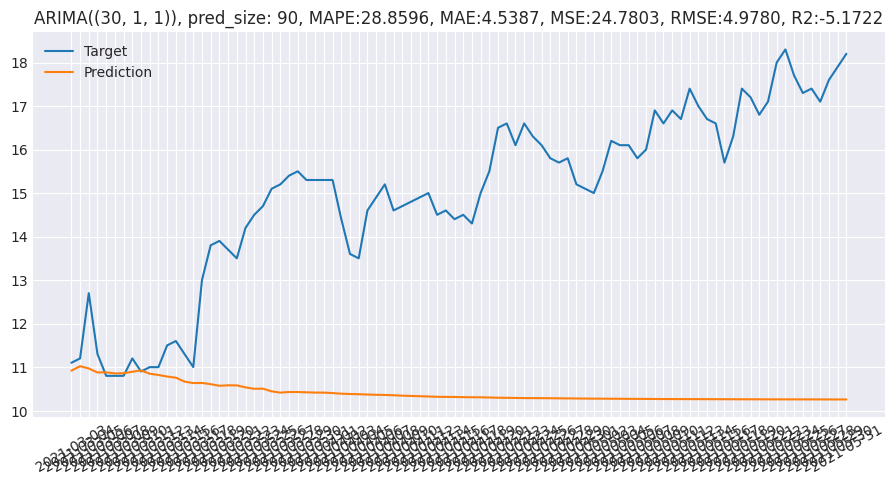

p: 30, d: 1, q: 1, pred_size: 90


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-03-03   10.8945
2021-03-04   10.9506
2021-03-05   10.9466
2021-03-06   10.8116
2021-03-07   10.8088
               ...  
2021-05-27    8.8708
2021-05-28    8.8537
2021-05-29    8.8391
2021-05-30    8.8269
2021-05-31    8.8145
Freq: D, Name: predicted_mean, Length: 90, dtype: float64
--- Evaluation Metrics ---
33.41494961642697 5.206074013081585 31.654124704153013 5.626199845735398 -7.21186330504983


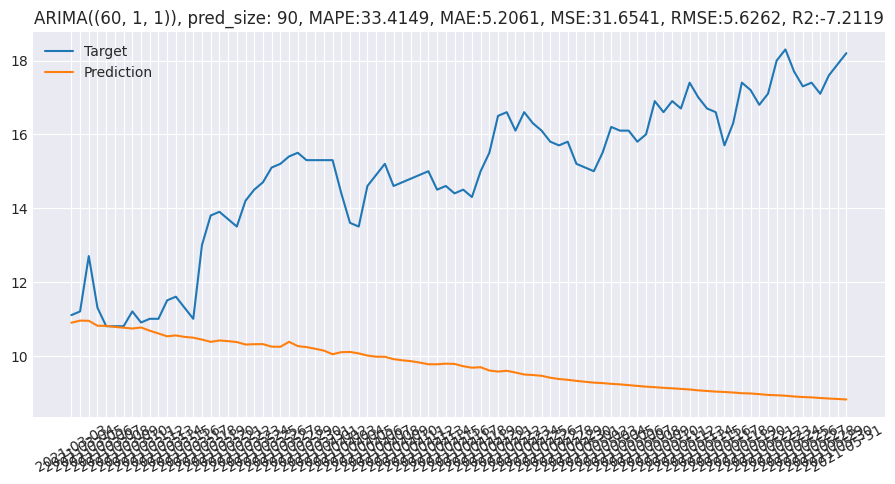

p: 60, d: 1, q: 1, pred_size: 90


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-03-03   10.9489
2021-03-04   11.0114
2021-03-05   11.0925
2021-03-06   10.9777
2021-03-07   10.9860
               ...  
2021-05-27   16.8466
2021-05-28   16.9765
2021-05-29   17.0957
2021-05-30   17.2186
2021-05-31   17.3681
Freq: D, Name: predicted_mean, Length: 90, dtype: float64
--- Evaluation Metrics ---
17.501158926346037 2.628005747780688 10.02142903490832 3.165664074867755 0.2147414950920078


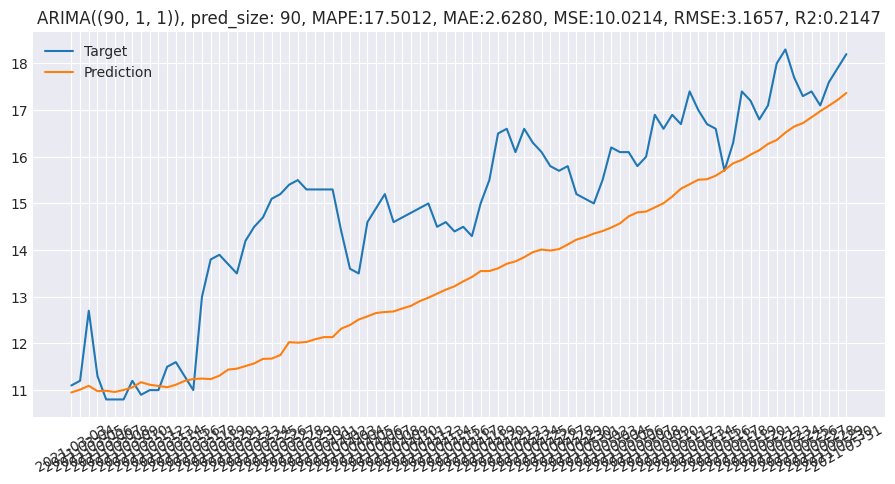

p: 90, d: 1, q: 1, pred_size: 90


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-03-03   10.8636
2021-03-04   10.9566
2021-03-05   10.9297
2021-03-06   10.9113
2021-03-07   10.9145
               ...  
2021-05-27    9.1602
2021-05-28    9.1501
2021-05-29    9.1401
2021-05-30    9.1304
2021-05-31    9.1208
Freq: D, Name: predicted_mean, Length: 90, dtype: float64
--- Evaluation Metrics ---
32.6617747802286 5.095688517052225 30.409158279870283 5.514449952612707 -6.84483494138914


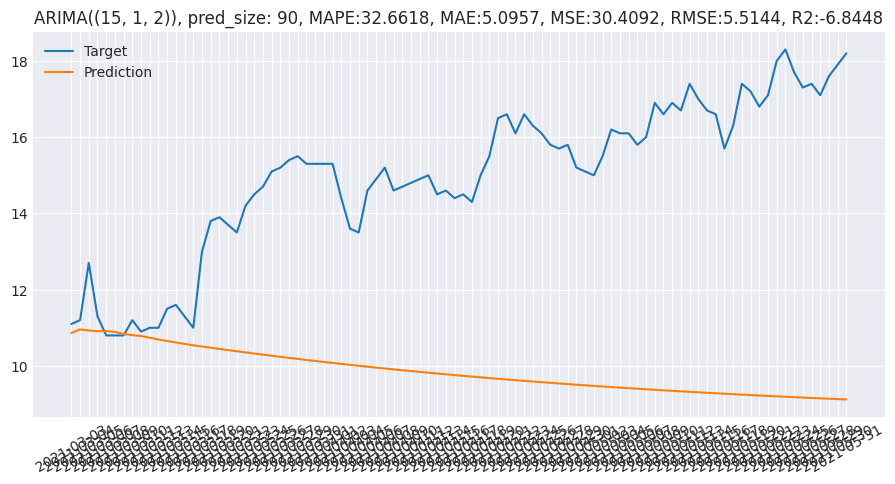

p: 15, d: 1, q: 2, pred_size: 90


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-03-03   10.9208
2021-03-04   11.0175
2021-03-05   10.9660
2021-03-06   10.8528
2021-03-07   10.8439
               ...  
2021-05-27    9.0297
2021-05-28    9.0178
2021-05-29    9.0067
2021-05-30    8.9952
2021-05-31    8.9844
Freq: D, Name: predicted_mean, Length: 90, dtype: float64
--- Evaluation Metrics ---
33.0640697343341 5.1546233585993955 31.05990920215329 5.573141771223238 -7.030983082512195


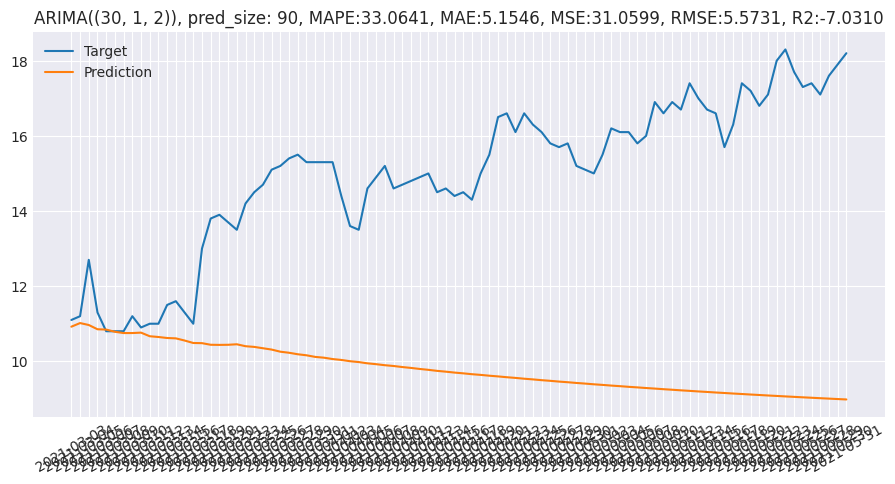

p: 30, d: 1, q: 2, pred_size: 90


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-03-03   10.8947
2021-03-04   10.9560
2021-03-05   10.9520
2021-03-06   10.8146
2021-03-07   10.8159
               ...  
2021-05-27    8.8831
2021-05-28    8.8639
2021-05-29    8.8501
2021-05-30    8.8373
2021-05-31    8.8251
Freq: D, Name: predicted_mean, Length: 90, dtype: float64
--- Evaluation Metrics ---
33.37204008663625 5.199783284922509 31.584979088729675 5.620051520113465 -7.1926837283608265


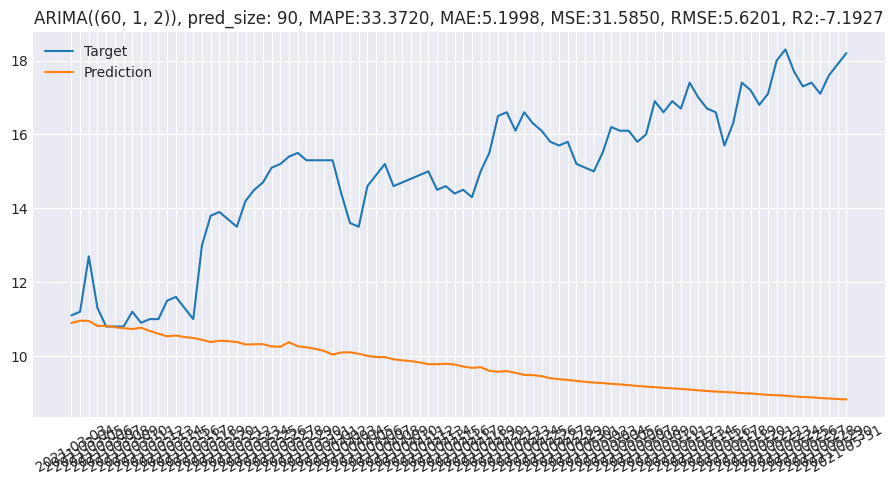

p: 60, d: 1, q: 2, pred_size: 90


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-03-03   10.9473
2021-03-04   11.0346
2021-03-05   11.0990
2021-03-06   10.9792
2021-03-07   10.9852
               ...  
2021-05-27   16.9334
2021-05-28   17.0614
2021-05-29   17.1664
2021-05-30   17.3008
2021-05-31   17.4319
Freq: D, Name: predicted_mean, Length: 90, dtype: float64
--- Evaluation Metrics ---
17.440849645202487 2.6158293108098283 9.927514964456218 3.1507959255490063 0.244363564165345


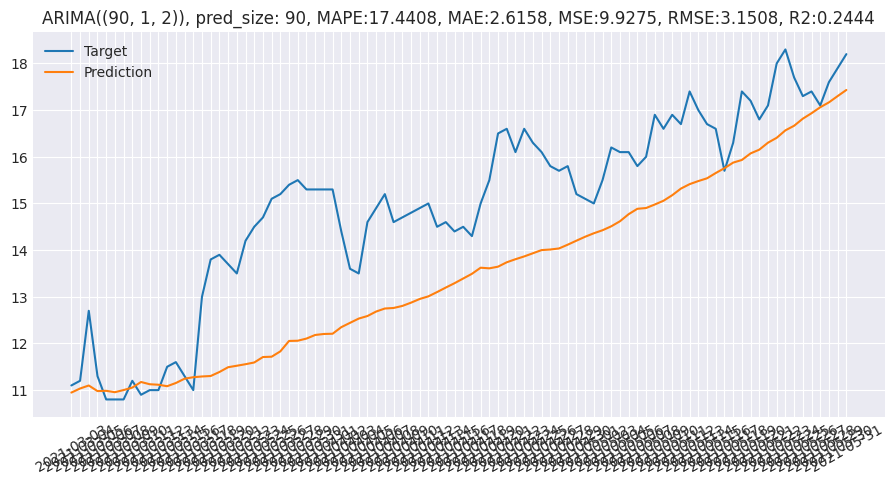

p: 90, d: 1, q: 2, pred_size: 90


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-17   16.5930
2021-05-18   16.5949
2021-05-19   16.5944
2021-05-20   16.5945
2021-05-21   16.5945
2021-05-22   16.5945
2021-05-23   16.5945
2021-05-24   16.5945
2021-05-25   16.5945
2021-05-26   16.5945
2021-05-27   16.5945
2021-05-28   16.5945
2021-05-29   16.5945
2021-05-30   16.5945
2021-05-31   16.5945
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
5.113501948579054 0.8974174263175642 1.0001993593652279 1.0000996747150894 -1.2014101623271523


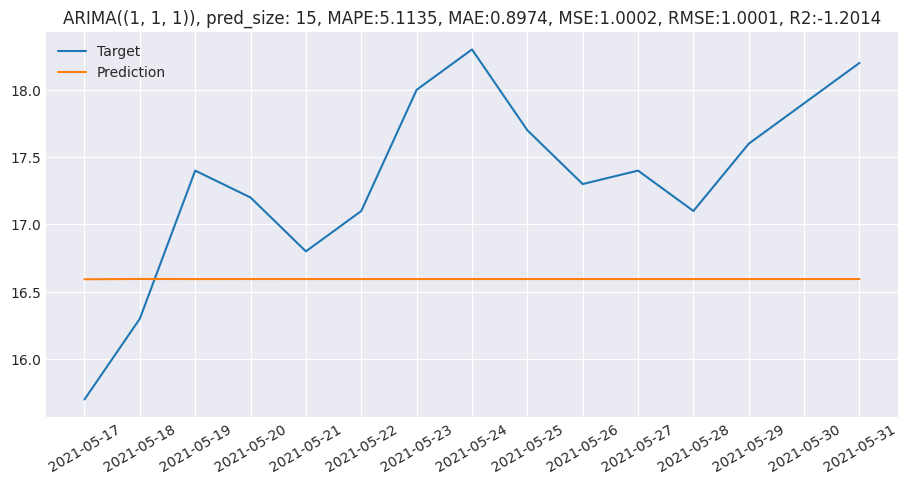

p: 1, d: 1, q: 1, pred_size: 15


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-02   15.1109
2021-05-03   15.1079
2021-05-04   15.1088
2021-05-05   15.1085
2021-05-06   15.1086
2021-05-07   15.1086
2021-05-08   15.1086
2021-05-09   15.1086
2021-05-10   15.1086
2021-05-11   15.1086
2021-05-12   15.1086
2021-05-13   15.1086
2021-05-14   15.1086
2021-05-15   15.1086
2021-05-16   15.1086
2021-05-17   15.1086
2021-05-18   15.1086
2021-05-19   15.1086
2021-05-20   15.1086
2021-05-21   15.1086
2021-05-22   15.1086
2021-05-23   15.1086
2021-05-24   15.1086
2021-05-25   15.1086
2021-05-26   15.1086
2021-05-27   15.1086
2021-05-28   15.1086
2021-05-29   15.1086
2021-05-30   15.1086
2021-05-31   15.1086
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
10.174789265608004 1.7486056899361397 3.680179460676121 1.918379383926996 -4.681117923356383


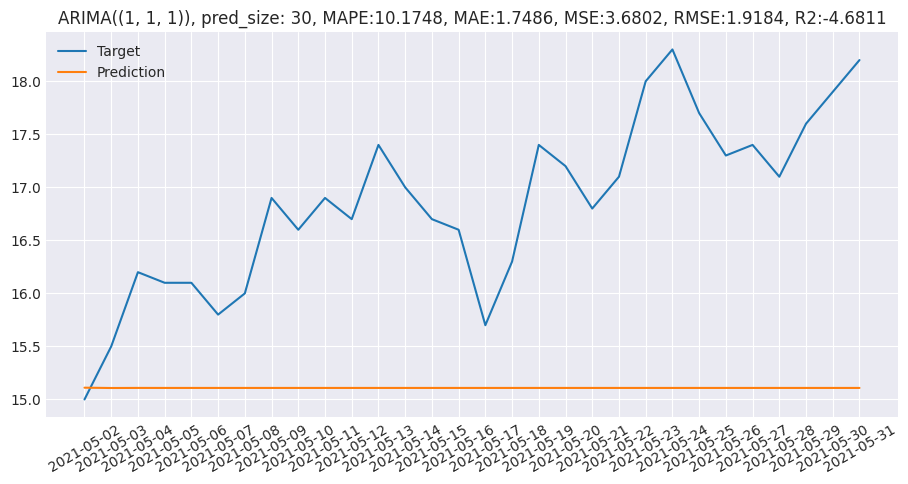

p: 1, d: 1, q: 1, pred_size: 30


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-04-02   15.2977
2021-04-03   15.2983
2021-04-04   15.2981
2021-04-05   15.2982
2021-04-06   15.2982
2021-04-07   15.2982
2021-04-08   15.2982
2021-04-09   15.2982
2021-04-10   15.2982
2021-04-11   15.2982
2021-04-12   15.2982
2021-04-13   15.2982
2021-04-14   15.2982
2021-04-15   15.2982
2021-04-16   15.2982
2021-04-17   15.2982
2021-04-18   15.2982
2021-04-19   15.2982
2021-04-20   15.2982
2021-04-21   15.2982
2021-04-22   15.2982
2021-04-23   15.2982
2021-04-24   15.2982
2021-04-25   15.2982
2021-04-26   15.2982
2021-04-27   15.2982
2021-04-28   15.2982
2021-04-29   15.2982
2021-04-30   15.2982
2021-05-01   15.2982
2021-05-02   15.2982
2021-05-03   15.2982
2021-05-04   15.2982
2021-05-05   15.2982
2021-05-06   15.2982
2021-05-07   15.2982
2021-05-08   15.2982
2021-05-09   15.2982
2021-05-10   15.2982
2021-05-11   15.2982
2021-05-12   15.2982
2021-05-13   15.2982
2021-05-14   15.2982
2021-05-15   15.2982
2021-05-16   15.2982
2021-05-17   15.2982
2021-05-18   15.29

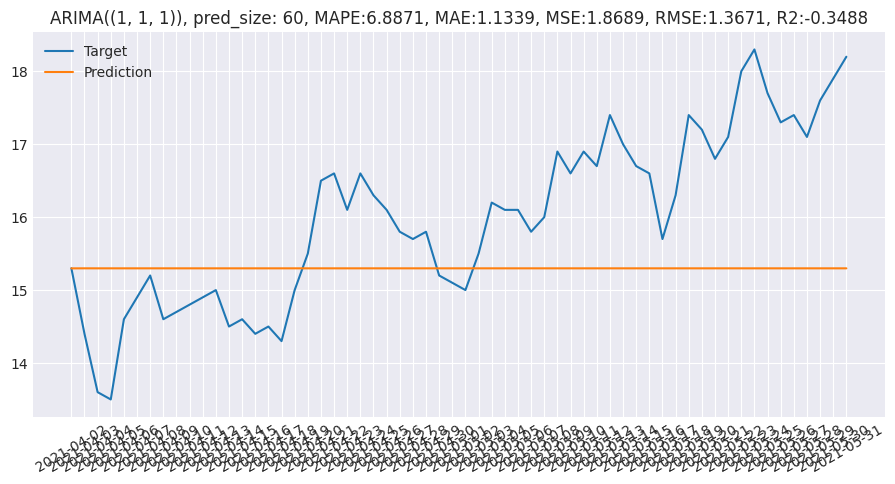

p: 1, d: 1, q: 1, pred_size: 60


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-03-03   10.7957
2021-03-04   10.7969
2021-03-05   10.7966
2021-03-06   10.7967
2021-03-07   10.7967
               ...  
2021-05-27   10.7967
2021-05-28   10.7967
2021-05-29   10.7967
2021-05-30   10.7967
2021-05-31   10.7967
Freq: D, Name: predicted_mean, Length: 90, dtype: float64
--- Evaluation Metrics ---
26.27914127984142 4.161129716357401 21.456995588287914 4.632169641570558 -4.180338225567914


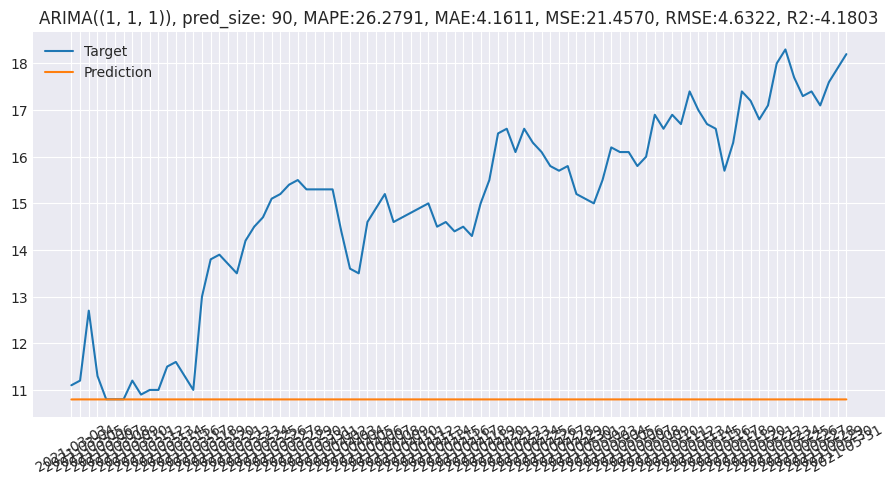

p: 1, d: 1, q: 1, pred_size: 90


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-17   16.6458
2021-05-18   16.6797
2021-05-19   16.6882
2021-05-20   16.6869
2021-05-21   16.6876
2021-05-22   16.6909
2021-05-23   16.6947
2021-05-24   16.6983
2021-05-25   16.7015
2021-05-26   16.7048
2021-05-27   16.7081
2021-05-28   16.7113
2021-05-29   16.7146
2021-05-30   16.7178
2021-05-31   16.7210
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
4.692908918741642 0.8223908350031085 0.8598038803260875 0.9272561028788581 -0.8505135139874644


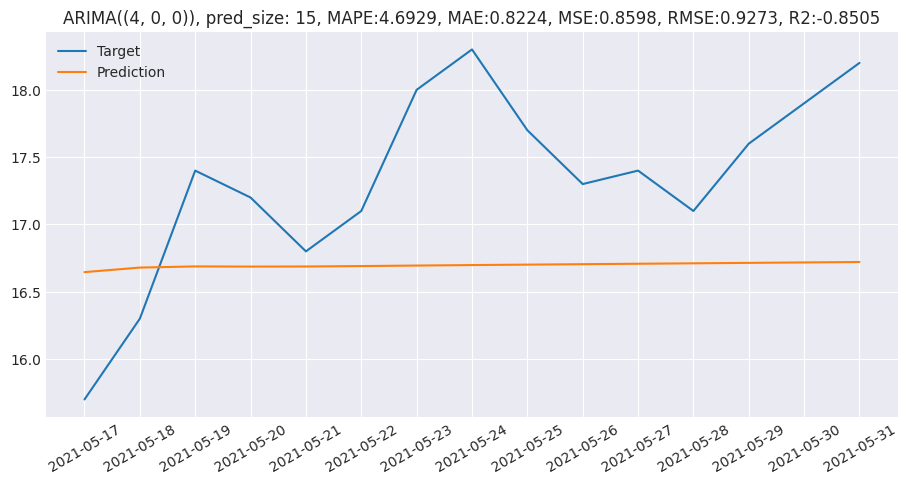

p: 4, d: 0, q: 0, pred_size: 15


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-02   15.1484
2021-05-03   15.2092
2021-05-04   15.2281
2021-05-05   15.2335
2021-05-06   15.2407
2021-05-07   15.2516
2021-05-08   15.2633
2021-05-09   15.2747
2021-05-10   15.2857
2021-05-11   15.2965
2021-05-12   15.3074
2021-05-13   15.3182
2021-05-14   15.3290
2021-05-15   15.3396
2021-05-16   15.3503
2021-05-17   15.3609
2021-05-18   15.3714
2021-05-19   15.3818
2021-05-20   15.3922
2021-05-21   15.4026
2021-05-22   15.4129
2021-05-23   15.4231
2021-05-24   15.4333
2021-05-25   15.4434
2021-05-26   15.4535
2021-05-27   15.4635
2021-05-28   15.4735
2021-05-29   15.4834
2021-05-30   15.4933
2021-05-31   15.5031
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
8.833843588790131 1.5212176608391959 2.8998726361746967 1.7029012408753177 -3.281958915556517


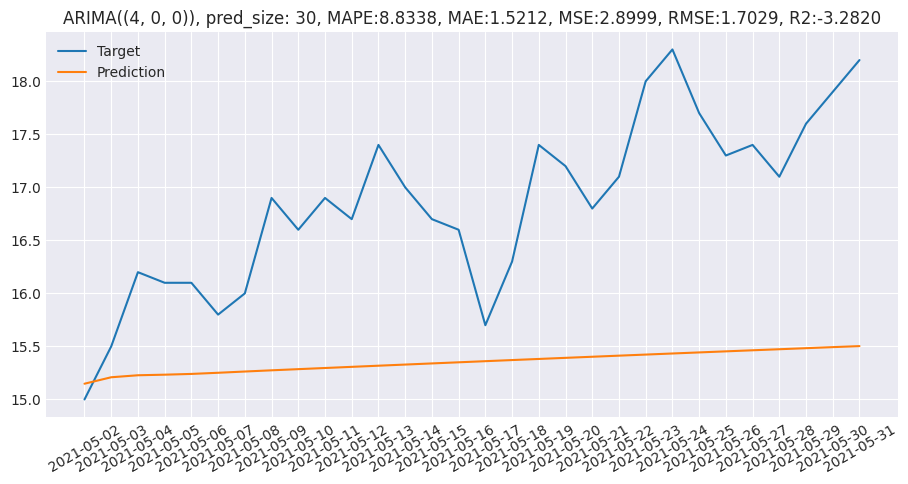

p: 4, d: 0, q: 0, pred_size: 30


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-04-02   15.3237
2021-04-03   15.3370
2021-04-04   15.3474
2021-04-05   15.3571
2021-04-06   15.3674
2021-04-07   15.3780
2021-04-08   15.3886
2021-04-09   15.3990
2021-04-10   15.4093
2021-04-11   15.4196
2021-04-12   15.4299
2021-04-13   15.4400
2021-04-14   15.4502
2021-04-15   15.4602
2021-04-16   15.4703
2021-04-17   15.4802
2021-04-18   15.4901
2021-04-19   15.5000
2021-04-20   15.5098
2021-04-21   15.5196
2021-04-22   15.5293
2021-04-23   15.5389
2021-04-24   15.5485
2021-04-25   15.5580
2021-04-26   15.5675
2021-04-27   15.5770
2021-04-28   15.5864
2021-04-29   15.5957
2021-04-30   15.6050
2021-05-01   15.6142
2021-05-02   15.6234
2021-05-03   15.6326
2021-05-04   15.6417
2021-05-05   15.6507
2021-05-06   15.6597
2021-05-07   15.6687
2021-05-08   15.6776
2021-05-09   15.6864
2021-05-10   15.6952
2021-05-11   15.7040
2021-05-12   15.7127
2021-05-13   15.7213
2021-05-14   15.7299
2021-05-15   15.7385
2021-05-16   15.7470
2021-05-17   15.7555
2021-05-18   15.76

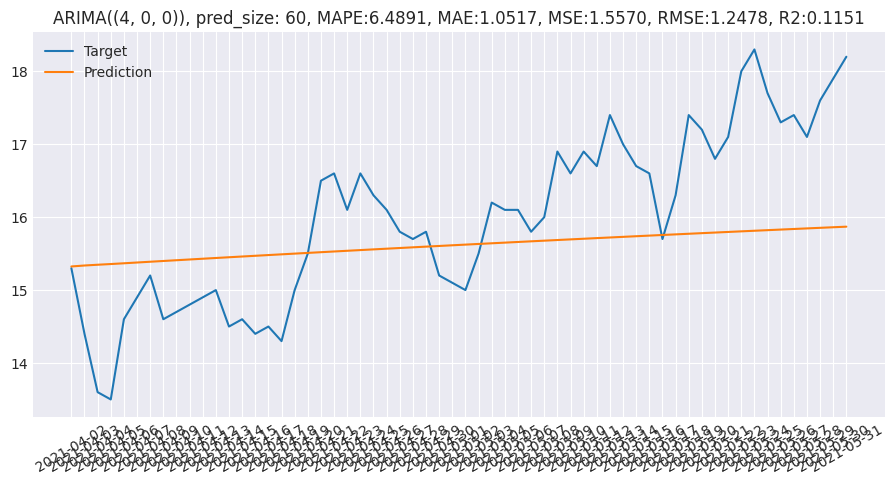

p: 4, d: 0, q: 0, pred_size: 60


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-03-03   10.8458
2021-03-04   10.9060
2021-03-05   10.9490
2021-03-06   10.9805
2021-03-07   11.0115
               ...  
2021-05-27   13.2150
2021-05-28   13.2367
2021-05-29   13.2584
2021-05-30   13.2799
2021-05-31   13.3013
Freq: D, Name: predicted_mean, Length: 90, dtype: float64
--- Evaluation Metrics ---
19.9232772620887 3.1191321277085637 12.346748871997542 3.513794085030815 -1.346824924228379


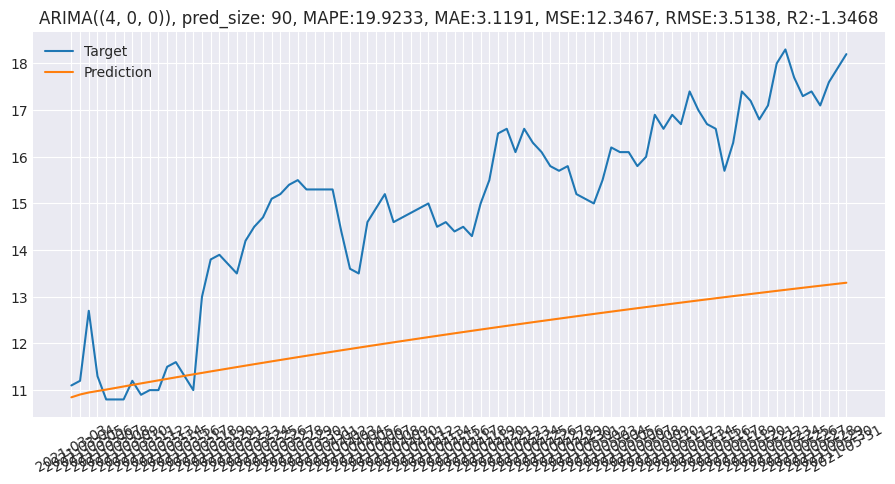

p: 4, d: 0, q: 0, pred_size: 90


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-17   16.6444
2021-05-18   16.6789
2021-05-19   16.6882
2021-05-20   16.6872
2021-05-21   16.6877
2021-05-22   16.6908
2021-05-23   16.6946
2021-05-24   16.6982
2021-05-25   16.7015
2021-05-26   16.7047
2021-05-27   16.7080
2021-05-28   16.7112
2021-05-29   16.7145
2021-05-30   16.7177
2021-05-31   16.7209
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
4.693594489085139 0.8225131290078349 0.8600256991299084 0.9273757054882926 -0.8502266057901466


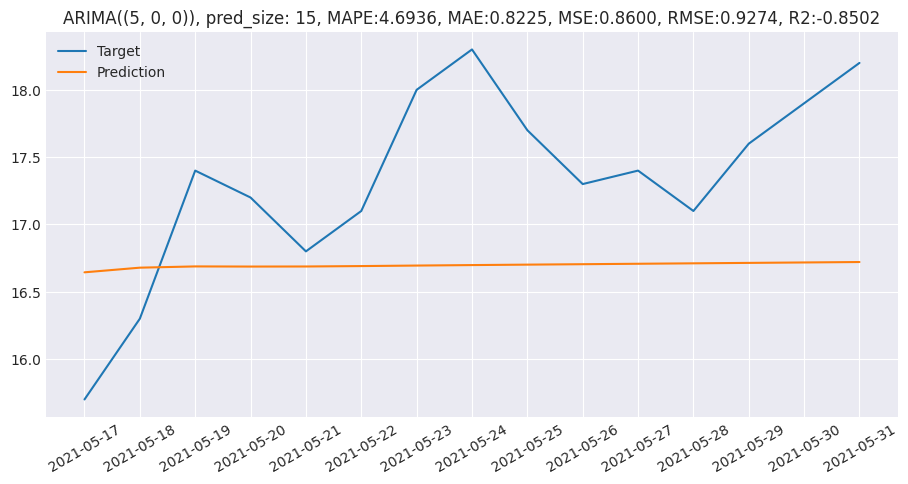

p: 5, d: 0, q: 0, pred_size: 15


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-05-02   15.1487
2021-05-03   15.2093
2021-05-04   15.2293
2021-05-05   15.2350
2021-05-06   15.2420
2021-05-07   15.2526
2021-05-08   15.2643
2021-05-09   15.2757
2021-05-10   15.2866
2021-05-11   15.2974
2021-05-12   15.3082
2021-05-13   15.3190
2021-05-14   15.3297
2021-05-15   15.3403
2021-05-16   15.3509
2021-05-17   15.3615
2021-05-18   15.3719
2021-05-19   15.3824
2021-05-20   15.3927
2021-05-21   15.4030
2021-05-22   15.4133
2021-05-23   15.4235
2021-05-24   15.4336
2021-05-25   15.4437
2021-05-26   15.4538
2021-05-27   15.4637
2021-05-28   15.4737
2021-05-29   15.4835
2021-05-30   15.4934
2021-05-31   15.5031
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
8.83058866340074 1.5206657059959365 2.8980512830078986 1.7023663774311035 -3.2796019506163754


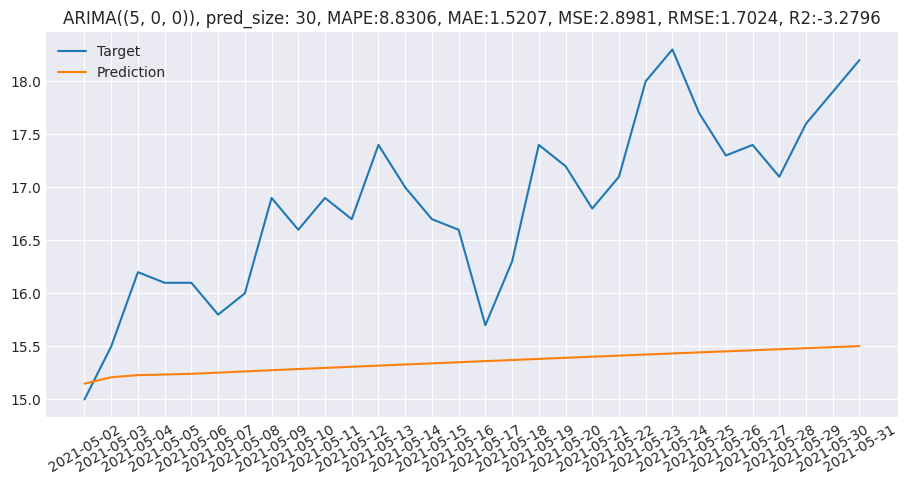

p: 5, d: 0, q: 0, pred_size: 30


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-04-02   15.3234
2021-04-03   15.3371
2021-04-04   15.3476
2021-04-05   15.3572
2021-04-06   15.3675
2021-04-07   15.3780
2021-04-08   15.3885
2021-04-09   15.3989
2021-04-10   15.4092
2021-04-11   15.4194
2021-04-12   15.4296
2021-04-13   15.4398
2021-04-14   15.4499
2021-04-15   15.4599
2021-04-16   15.4699
2021-04-17   15.4798
2021-04-18   15.4897
2021-04-19   15.4995
2021-04-20   15.5093
2021-04-21   15.5190
2021-04-22   15.5287
2021-04-23   15.5383
2021-04-24   15.5478
2021-04-25   15.5573
2021-04-26   15.5668
2021-04-27   15.5762
2021-04-28   15.5856
2021-04-29   15.5949
2021-04-30   15.6041
2021-05-01   15.6133
2021-05-02   15.6225
2021-05-03   15.6316
2021-05-04   15.6407
2021-05-05   15.6497
2021-05-06   15.6587
2021-05-07   15.6676
2021-05-08   15.6764
2021-05-09   15.6853
2021-05-10   15.6940
2021-05-11   15.7028
2021-05-12   15.7114
2021-05-13   15.7201
2021-05-14   15.7287
2021-05-15   15.7372
2021-05-16   15.7457
2021-05-17   15.7541
2021-05-18   15.76

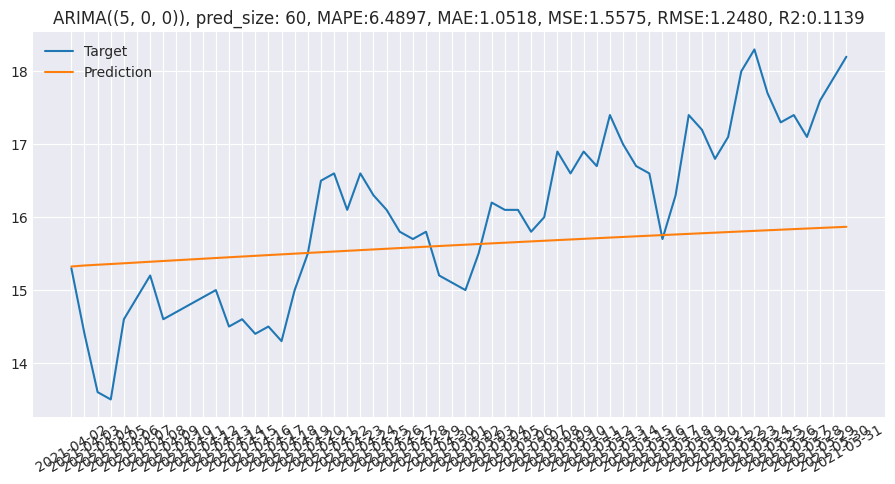

p: 5, d: 0, q: 0, pred_size: 60


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-03-03   10.8458
2021-03-04   10.9059
2021-03-05   10.9493
2021-03-06   10.9810
2021-03-07   11.0118
               ...  
2021-05-27   13.2067
2021-05-28   13.2284
2021-05-29   13.2499
2021-05-30   13.2714
2021-05-31   13.2927
Freq: D, Name: predicted_mean, Length: 90, dtype: float64
--- Evaluation Metrics ---
19.94169493502376 3.122305192342111 12.369112197128775 3.516974864443699 -1.3546499516803396


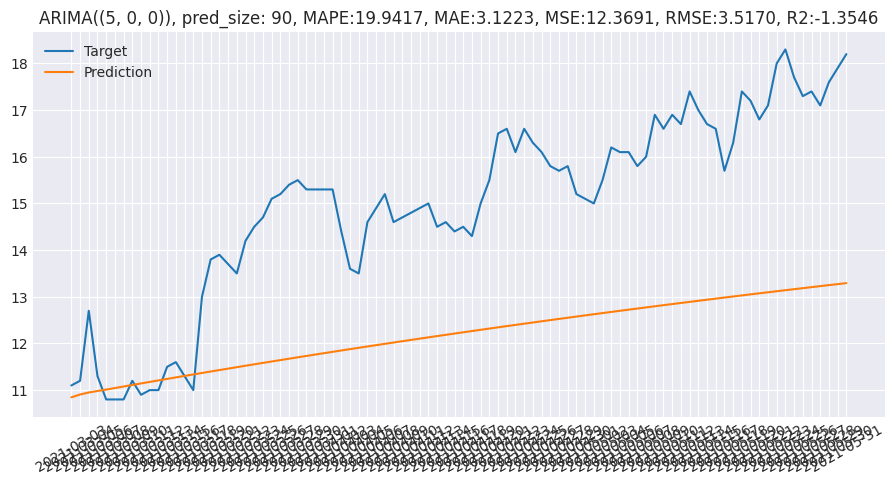

p: 5, d: 0, q: 0, pred_size: 90


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-05-17   16.6492
2021-05-18   16.6798
2021-05-19   16.7104
2021-05-20   16.7441
2021-05-21   16.7682
2021-05-22   16.7855
2021-05-23   16.7965
2021-05-24   16.8006
2021-05-25   16.7999
2021-05-26   16.7958
2021-05-27   16.7895
2021-05-28   16.7825
2021-05-29   16.7758
2021-05-30   16.7700
2021-05-31   16.7655
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
4.429213944681051 0.7753518158769789 0.7838950935668391 0.8853785029956618 -0.625745221094735


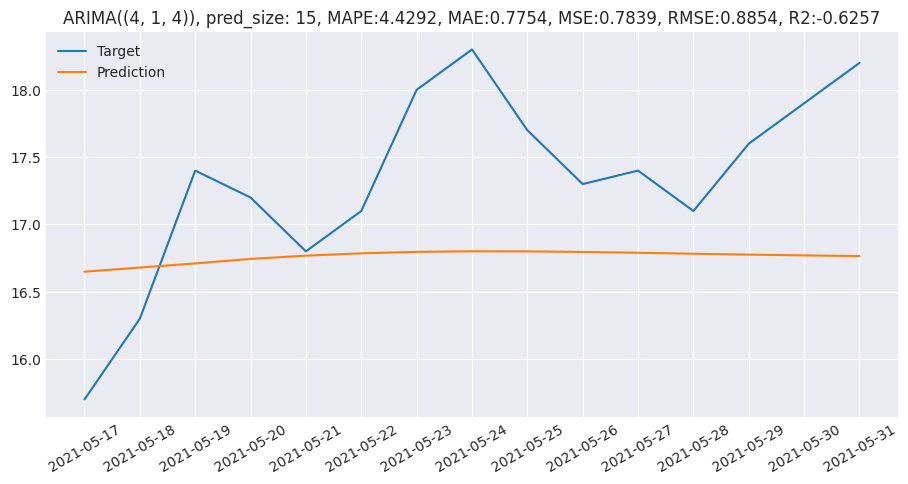

p: 4, d: 1, q: 4, pred_size: 15


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


--- predict ---
2021-05-02   15.1712
2021-05-03   15.2317
2021-05-04   15.2361
2021-05-05   15.2446
2021-05-06   15.2558
2021-05-07   15.2408
2021-05-08   15.2231
2021-05-09   15.2193
2021-05-10   15.2147
2021-05-11   15.2091
2021-05-12   15.2112
2021-05-13   15.2157
2021-05-14   15.2170
2021-05-15   15.2187
2021-05-16   15.2210
2021-05-17   15.2210
2021-05-18   15.2201
2021-05-19   15.2198
2021-05-20   15.2193
2021-05-21   15.2186
2021-05-22   15.2183
2021-05-23   15.2185
2021-05-24   15.2185
2021-05-25   15.2186
2021-05-26   15.2188
2021-05-27   15.2189
2021-05-28   15.2189
2021-05-29   15.2190
2021-05-30   15.2190
2021-05-31   15.2189
Freq: D, Name: predicted_mean, dtype: float64
--- Evaluation Metrics ---
9.558834151763918 1.6441566999376866 3.3031314112595855 1.8174519006729135 -4.1006315442262675


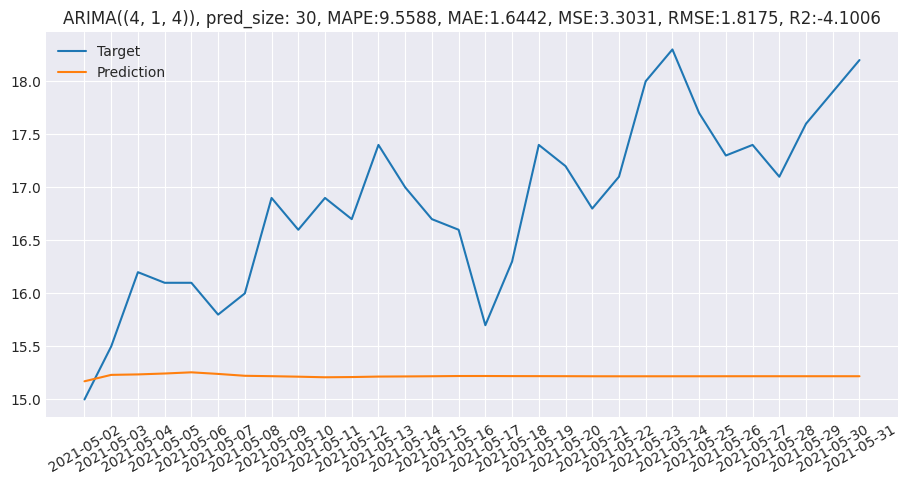

p: 4, d: 1, q: 4, pred_size: 30


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-04-02   15.3109
2021-04-03   15.3109
2021-04-04   15.3189
2021-04-05   15.3327
2021-04-06   15.3355
2021-04-07   15.3333
2021-04-08   15.3342
2021-04-09   15.3331
2021-04-10   15.3293
2021-04-11   15.3280
2021-04-12   15.3285
2021-04-13   15.3280
2021-04-14   15.3280
2021-04-15   15.3290
2021-04-16   15.3294
2021-04-17   15.3293
2021-04-18   15.3295
2021-04-19   15.3296
2021-04-20   15.3294
2021-04-21   15.3292
2021-04-22   15.3292
2021-04-23   15.3292
2021-04-24   15.3291
2021-04-25   15.3292
2021-04-26   15.3292
2021-04-27   15.3292
2021-04-28   15.3292
2021-04-29   15.3293
2021-04-30   15.3293
2021-05-01   15.3292
2021-05-02   15.3292
2021-05-03   15.3292
2021-05-04   15.3292
2021-05-05   15.3292
2021-05-06   15.3292
2021-05-07   15.3292
2021-05-08   15.3292
2021-05-09   15.3292
2021-05-10   15.3292
2021-05-11   15.3292
2021-05-12   15.3292
2021-05-13   15.3292
2021-05-14   15.3292
2021-05-15   15.3292
2021-05-16   15.3292
2021-05-17   15.3292
2021-05-18   15.32

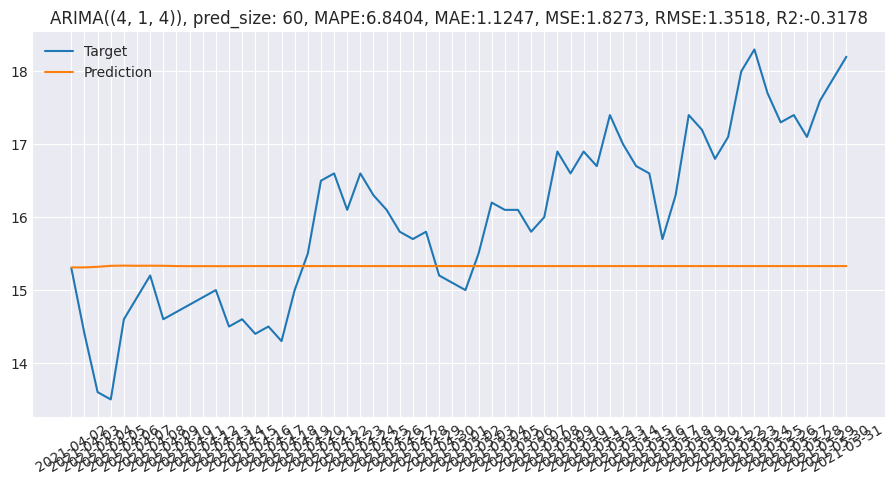

p: 4, d: 1, q: 4, pred_size: 60


/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ssm/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


--- predict ---
2021-03-03   10.8951
2021-03-04   10.9888
2021-03-05   10.9555
2021-03-06   10.9360
2021-03-07   10.9588
               ...  
2021-05-27   10.9213
2021-05-28   10.9213
2021-05-29   10.9213
2021-05-30   10.9213
2021-05-31   10.9213
Freq: D, Name: predicted_mean, Length: 90, dtype: float64
--- Evaluation Metrics ---
25.49963830510827 4.043887135862542 20.42503924160659 4.519406956848054 -3.933200407618761


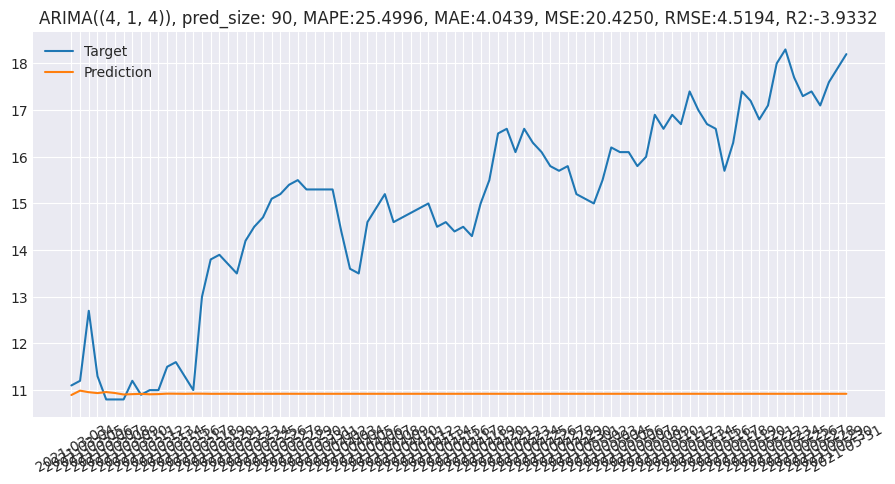

p: 4, d: 1, q: 4, pred_size: 90


MAPE    MAE     MSE   RMSE      R2
order                                               
(15, 1, 1, 15)  4.3301 0.7576  0.7550 0.8689 -0.5660
(30, 1, 1, 15)  4.1033 0.7166  0.6916 0.8316 -0.3217
(60, 1, 1, 15)  3.4544 0.5980  0.5527 0.7434  0.2279
(90, 1, 1, 15)  5.3116 0.9011  1.2631 1.1239 -0.4122
(15, 1, 2, 15)  3.8238 0.6660  0.6301 0.7938 -0.0781
(30, 1, 2, 15)  3.6134 0.6277  0.5849 0.7648  0.0873
(60, 1, 2, 15)  3.4711 0.6012  0.5556 0.7454  0.2065
(90, 1, 2, 15)  5.3306 0.9049  1.2675 1.1259 -0.4006
(15, 1, 1, 30)  9.3487 1.6085  3.1820 1.7838 -3.9641
(30, 1, 1, 30)  8.2058 1.4147  2.5661 1.6019 -2.8632
(60, 1, 1, 30)  5.7705 0.9924  1.4198 1.1916 -0.4185
(90, 1, 1, 30)  7.4824 1.2443  2.3080 1.5192 -0.1753
(15, 1, 2, 30)  7.2097 1.2443  2.0753 1.4406 -1.8692
(30, 1, 2, 30)  7.0489 1.2164  2.0022 1.4150 -1.6533
(60, 1, 2, 30)  5.7765 0.9935  1.4218 1.1924 -0.4336
(90, 1, 2, 30)  7.4762 1.2431  2.3151 1.5216 -0.1992
(15, 1, 1, 60)  6.5656 1.0696  1.6127 1.2699 -0.1308
(30, 1, 1, 60)  7.0160 1.0852  1.7433 1.3203  0.2629
(60, 1, 1, 60)  7.4050 1.1597  1.9946 1.4123  0.6308
(90, 1, 1, 60) 12.8739 2.0026  6.3631 2.5225 -1.1026
(15, 1, 2, 60)  7.7166 1.1913  2.1293 1.4592  0.3777
(30, 1, 2, 60)  7.7047 1.1950  2.1369 1.4618  0.5016
(60, 1, 2, 60)  7.4218 1.1619  2.0032 1.4153  0.6277
(90, 1, 2, 60) 13.1088 2.0387  6.6007 2.5692 -1.2412
(15, 1, 1, 90) 26.5615 4.2022 21.7972 4.6687 -4.2938
(30, 1, 1, 90) 28.8596 4.5387 24.7803 4.9780 -5.1722
(60, 1, 1, 90) 33.4149 5.2061 31.6541 5.6262 -7.2119
(90, 1, 1, 90) 17.5012 2.6280 10.0214 3.1657  0.2147
(15, 1, 2, 90) 32.6618 5.0957 30.4092 5.5144 -6.8448
(30, 1, 2, 90) 33.0641 5.1546 31.0599 5.5731 -7.0310
(60, 1, 2, 90) 33.3720 5.1998 31.5850 5.6201 -7.1927
(90, 1, 2, 90) 17.4408 2.6158  9.9275 3.1508  0.2444
(1, 1, 1, 15)   5.1135 0.8974  1.0002 1.0001 -1.2014
(1, 1, 1, 30)  10.1748 1.7486  3.6802 1.9184 -4.6811
(1, 1, 1, 60)   6.8871 1.1339  1.8689 1.3671 -0.3488
(1, 1, 1, 90)  26.2791 4.1611 21.4570 4.6322 -4.1803
(4, 0, 0, 15)   4.6929 0.8224  0.8598 0.9273 -0.8505
(4, 0, 0, 30)   8.8338 1.5212  2.8999 1.7029 -3.2820
(4, 0, 0, 60)   6.4891 1.0517  1.5570 1.2478  0.1151
(4, 0, 0, 90)  19.9233 3.1191 12.3467 3.5138 -1.3468
(5, 0, 0, 15)   4.6936 0.8225  0.8600 0.9274 -0.8502
(5, 0, 0, 30)   8.8306 1.5207  2.8981 1.7024 -3.2796
(5, 0, 0, 60)   6.4897 1.0518  1.5575 1.2480  0.1139
(5, 0, 0, 90)  19.9417 3.1223 12.3691 3.5170 -1.3546
(4, 1, 4, 15)   4.4292 0.7754  0.7839 0.8854 -0.6257
(4, 1, 4, 30)   9.5588 1.6442  3.3031 1.8175 -4.1006
(4, 1, 4, 60)   6.8404 1.1247  1.8273 1.3518 -0.3178
(4, 1, 4, 90)  25.4996 4.0439 20.4250 4.5194 -3.9332

In [23]:
def fit_model_arima(p, d, q, pred_size):
    model = ARIMA(trn, order=(p, d, q)).fit()
    prd = model.predict(start=len(trn), end=len(trn) + (pred_size-1), dynamic=True)
    print('--- predict ---')
    print(prd)

    r1 = mape(prd.values , tst.values)
    r2 = mae(prd.values , tst.values)
    r3 = mse(prd.values , tst.values)
    r4 = rmse(prd.values , tst.values)
    r5 = r_squered(prd.values , tst.values)
    print('--- Evaluation Metrics ---')
    print(r1, r2, r3, r4, r5)

    result_list.append([(p, d, q, pred_size), r1, r2, r3, r4, r5])

    plt.figure(figsize=(11, 5))
    plt.title(f"ARIMA({p, d, q}), pred_size: {pred_size}, MAPE:{r1:.4f}, MAE:{r2:.4f}, MSE:{r3:.4f}, RMSE:{r4:.4f}, R2:{r5:.4f}")
    plt.plot(tst.index, tst, label="Target")
    plt.plot(tst.index, prd, label="Prediction")
    plt.xticks(rotation=30)
    plt.legend()
    plt.savefig('./fig_0221/ARIMA_' + years + f'_result_{p, d, q, pred_size}.png')
    plt.show()

# Listed in p,d,q ordered pairs
# step_size == pred_size
ord_list = [[15, 1, 1, 15], [30, 1, 1, 15], [60, 1, 1, 15], [90, 1, 1, 15],
            [15, 1, 2, 15], [30, 1, 2, 15], [60, 1, 2, 15], [90, 1, 2, 15],
            [15, 1, 1, 30], [30, 1, 1, 30], [60, 1, 1, 30], [90, 1, 1, 30],
            [15, 1, 2, 30], [30, 1, 2, 30], [60, 1, 2, 30], [90, 1, 2, 30],
            [15, 1, 1, 60], [30, 1, 1, 60], [60, 1, 1, 60], [90, 1, 1, 60],
            [15, 1, 2, 60], [30, 1, 2, 60], [60, 1, 2, 60], [90, 1, 2, 60],
            [15, 1, 1, 90], [30, 1, 1, 90], [60, 1, 1, 90], [90, 1, 1, 90],
            [15, 1, 2, 90], [30, 1, 2, 90], [60, 1, 2, 90], [90, 1, 2, 90], 
            [1, 1, 1, 15], [1, 1, 1, 30], [1, 1, 1, 60], [1, 1, 1, 90], 
            [4, 0, 0, 15], [4, 0, 0, 30], [4, 0, 0, 60], [4, 0, 0, 90], 
            [5, 0, 0, 15], [5, 0, 0, 30], [5, 0, 0, 60], [5, 0, 0, 90], 
            [4, 1, 4, 15], [4, 1, 4, 30], [4, 1, 4, 60], [4, 1, 4, 90]]


result_list = []

for p, d, q, pred_size in ord_list:
    trn, tst = df[:-pred_size], df[-pred_size:]
    fit_model_arima(p, d, q, pred_size)
    print(f'p: {p}, d: {d}, q: {q}, pred_size: {pred_size}')

pd.set_option('float_format', '{:.4f}'.format)
result_df = pd.DataFrame(result_list, columns=['order', 'MAPE', 'MAE', 'MSE', 'RMSE', 'R2'])
result_df.set_index('order', inplace=True)
result_df.to_csv('./result/ARIMA_result_' + years + '_all.csv')
result_df